<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_1501-1550.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8283]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [8284]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit ERROR: [12:42:42] non-ring atom 1 marked aromatic


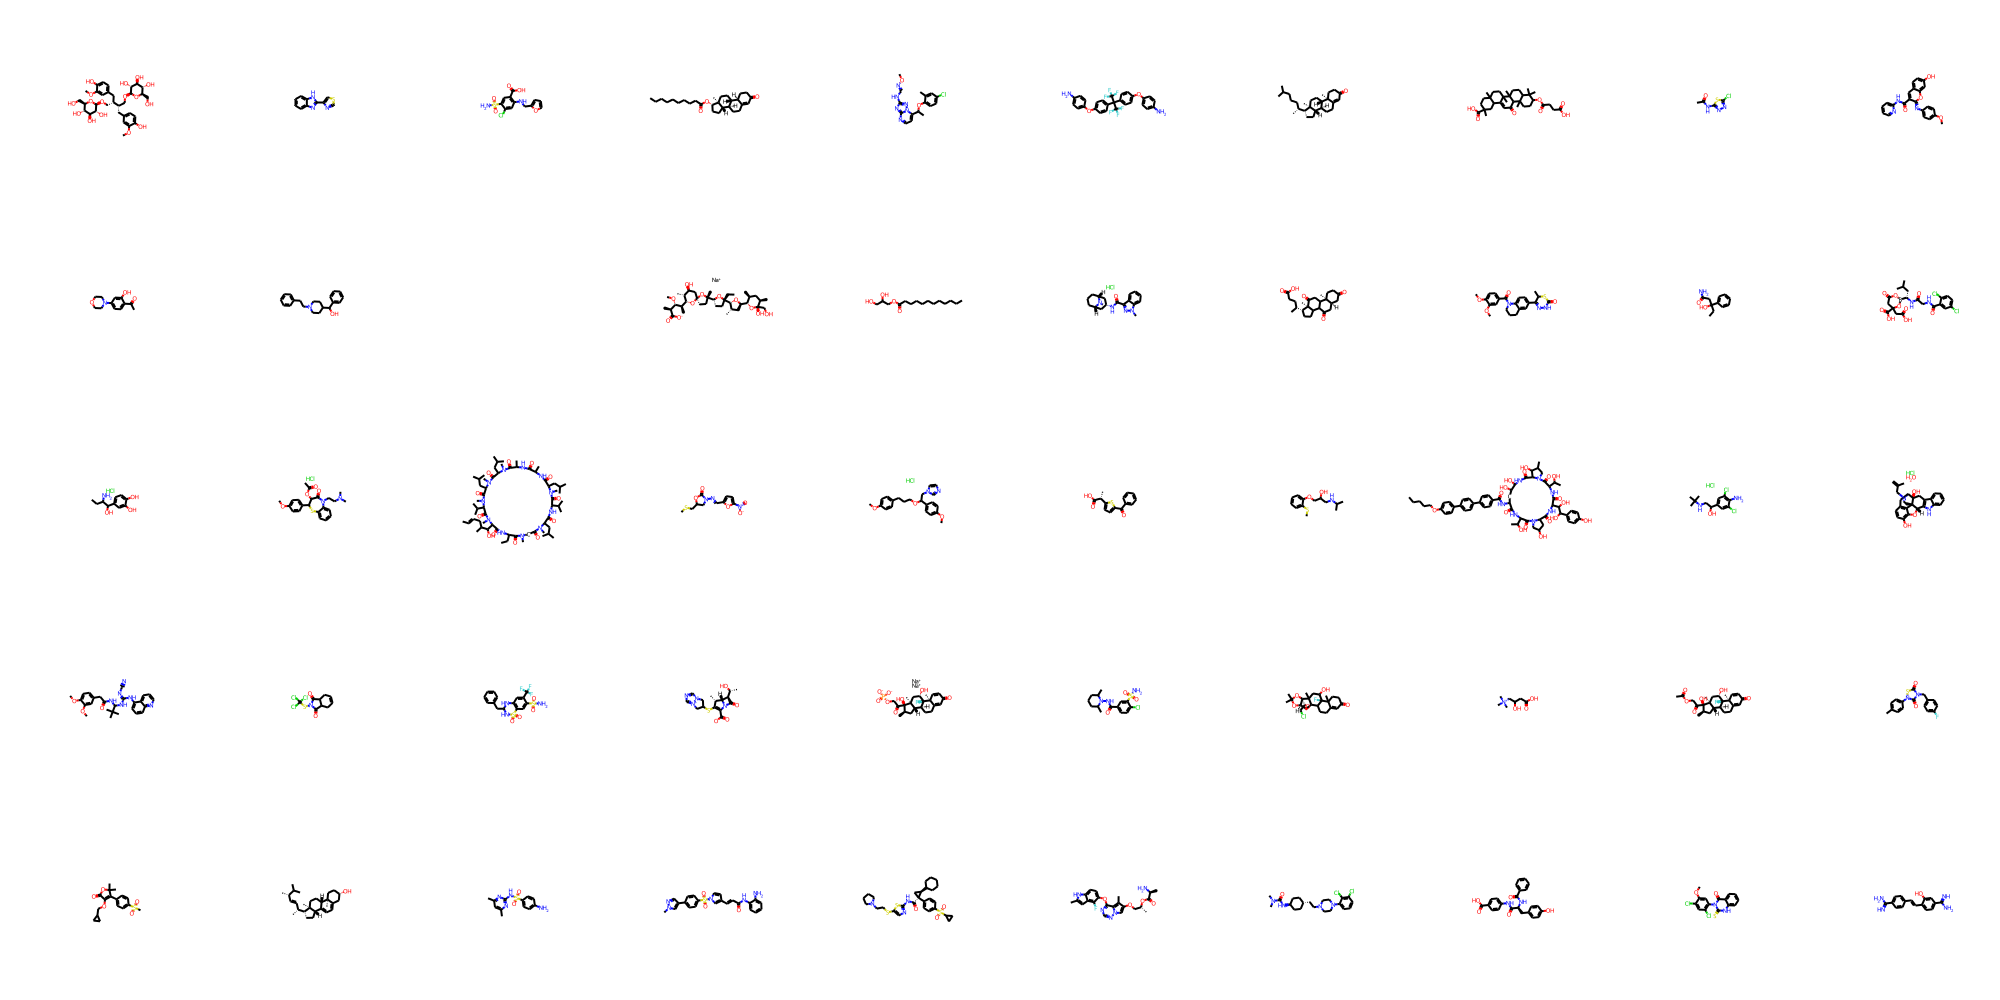

In [8285]:
smiles_list = [

'COc1cc(C[C@@H](CO[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)[C@H](CO[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)Cc2ccc(O)c(OC)c2)ccc1O',
'c1ccc2[nH]c(-c3cscn3)nc2c1',
'NS(=O)(=O)c1cc(C(=O)O)c(NCc2ccco2)cc1Cl',
'CCCCCCCCCC(=O)O[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4[C@H]3CC[C@]12C',
'CO/N=C/Nc1nc2nccc(C(C)Oc3ccc(Cl)cc3C)n2n1',
'Nc1ccc(Oc2ccc(C(c3ccc(Oc4ccc(N)cc4)cc3)(C(F)(F)F)C(F)(F)F)cc2)cc1',
'CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3CC[C@@]21C',
'CC1(C(=O)O)CCC2(C)CCC3(C)C(=CC(=O)C4C5(C)CCC(OC(=O)CCC(=O)O)C(C)(C)C5CCC43C)C2C1',
'CC(=O)Nc1nnc(Cl)s1',
'COc1ccc(/N=c2\oc3cc(O)ccc3cc2C(=O)Nc2ccccn2)cc1',
'CC(=O)c1ccc(N2CCOCC2)cc1O',
'OC(c1ccccc1)C1CCN(CCc2ccccc2)CC1',
'No Data',
'CC[C@@]1([C@@H]2O[C@@H]([C@H]3O[C@@](O)(CO)[C@H](C)C[C@@H]3C)C[C@@H]2C)CC[C@H]([C@]2(C)CC[C@]3(C[C@H](O)[C@@H](C)[C@@H]([C@@H](C)[C@@H](OC)[C@H](C)C(=O)[O-])O3)O2)O1.[Na+]',
'CCCCCCCCCCCC(=O)OCC(O)CO',
'CN1[C@H]2CCC[C@@H]1C[C@H](NC(=O)c1nn(C)c3ccccc13)C2.Cl',
'CC(CCC(=O)O)[C@H]1CCC2C3C(=O)C[C@@H]4CC(=O)CC[C@]4(C)C3CC(=O)[C@@]21C',
'COc1ccc(C(=O)N2CCCc3cc(C4=NNC(=O)SC4C)ccc32)cc1OC',
'CCC(O)(CC(N)=O)c1ccccc1',
'CC(C)C[C@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B1OC(=O)CC(CC(=O)O)(C(=O)O)O1',
'CCC(N)C(O)c1ccc(O)c(O)c1.Cl',
'COc1ccc(C2Sc3ccccc3N(CCN(C)C)C(=O)C2OC(C)=O)cc1.Cl',
'C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C',
'CSCC1CN(/N=C/c2ccc([N+](=O)[O-])o2)C(=O)O1',
'COc1ccc(CCCOC(Cn2ccnc2)c2ccc(OC)cc2)cc1.Cl',
'C[C@@H](C(=O)O)c1ccc(C(=O)c2ccccc2)s1',
'CSc1ccccc1OCC(O)CNC(C)C',
'CCCCCOc1ccc(-c2ccc(-c3ccc(C(=O)NC4CC(O)C(O)NC(=O)C5C(O)C(C)CN5C(=O)C(C(C)O)NC(=O)C(C(O)C(O)c5ccc(O)cc5)NC(=O)C5CC(O)CN5C(=O)C(C(C)O)NC4=O)cc3)cc2)cc1',
'CC(C)(C)NCC(O)c1cc(Cl)c(N)c(Cl)c1.Cl',
'C=C(C)CN1CC[C@]23c4c5ccc(O)c4O[C@H]2c2[nH]c4ccccc4c2C[C@@]3(O)C1C5.Cl.O',
'COc1ccc(CC(=O)NC(N/C(=N/C#N)Nc2cccc3ncccc23)C(C)(C)C)cc1OC',
'O=C1C2CC=CCC2C(=O)N1SC(Cl)(Cl)Cl',
'NS(=O)(=O)c1cc2c(cc1C(F)(F)F)NC(Cc1ccccc1)NS2(=O)=O',
'C[C@@H](O)[C@H]1C(=O)N2C(C(=O)[O-])=C(SC3Cn4cnc[n+]4C3)[C@H](C)[C@H]12',
'C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)COP(=O)([O-])[O-].[Na+].[Na+]',
'CC1CCCC(C)N1NC(=O)c1ccc(Cl)c(S(N)(=O)=O)c1',
'CC1(C)O[C@@H]2CC3C4CCC5=CC(=O)CCC5(C)C4(F)C(O)CC3(C)[C@]2(C(=O)CCl)O1',
'C[N+](C)(C)CC(O)CC(=O)O',
'CC(=O)OCC(=O)[C@@]1(O)[C@H](C)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@@]21C',
'Cc1ccc(-n2sc(=O)n(Cc3ccc(F)cc3)c2=O)cc1',
'CC1(C)OC(=O)C(OCC2CC2)=C1c1ccc(S(C)(=O)=O)cc1',
'CC(C)[C@@H](C)/C=C/[C@@H](C)[C@H]1CC[C@H]2C3=CC=C4C[C@@H](O)CC[C@]4(C)[C@H]3CC[C@@]21C',
'Cc1cc(C)nc(NS(=O)(=O)c2ccc(N)cc2)n1',
'Cn1cc(-c2ccc(S(=O)(=O)n3ccc(/C=C/C(=O)Nc4ccccc4N)c3)cc2)cn1',
'O=C(Nc1ncc(SCCN2CCCC2)s1)[C@]1(c2ccc(S(=O)(=O)C3CC3)cc2)C[C@H]1C1CCCCC1',
'Cc1cc2c(F)c(Oc3ncnn4cc(OC[C@@H](C)OC(=O)[C@H](C)N)c(C)c34)ccc2[nH]1',
'CN(C)C(=O)N[C@H]1CC[C@H](CCN2CCN(c3cccc(Cl)c3Cl)CC2)CC1',
'O=C(O)c1ccc(NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)c2ccccc2)cc1',
'COc1cc(-n2c(=S)[nH]c3ccccc3c2=O)c(Cl)cc1Cl',
'N=C(N)c1ccc(/C=C/c2ccc(C(=N)N)cc2O)cc1',


               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



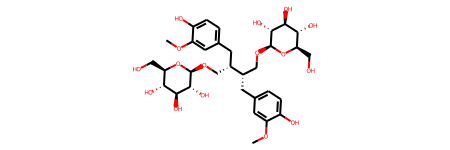

In [8286]:
M1 = mol_list [0]
M1

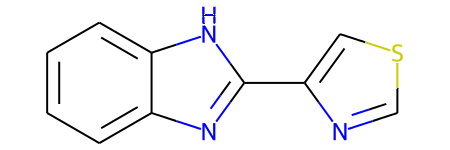

In [8287]:
M2 = mol_list [1]
M2

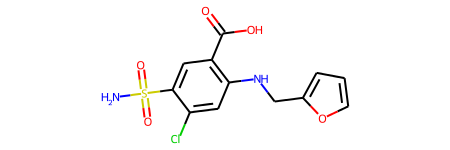

In [8288]:
M3 = mol_list [2]
M3

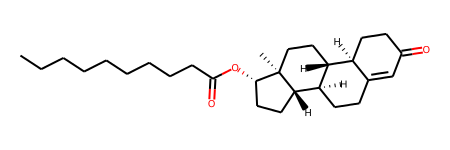

In [8289]:
M4 = mol_list [3]
M4

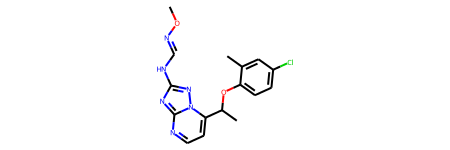

In [8290]:
M5 = mol_list [4]
M5

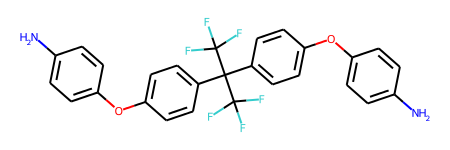

In [8291]:
M6 = mol_list [5]
M6

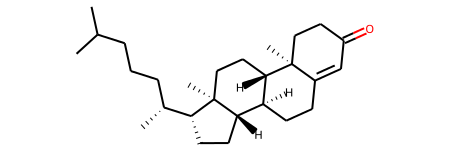

In [8292]:
M7 = mol_list [6]
M7

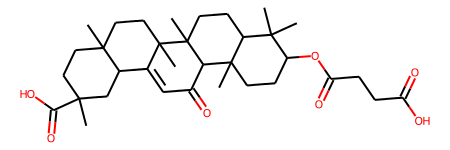

In [8293]:
M8 = mol_list [7]
M8

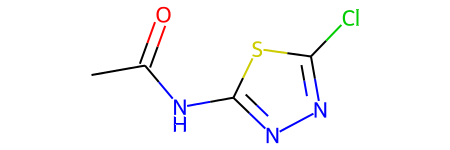

In [8294]:
M9 = mol_list [8]
M9

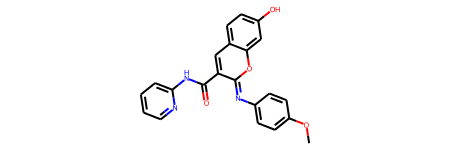

In [8295]:
M10 = mol_list [9]
M10

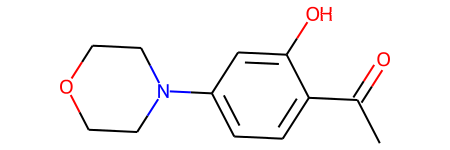

In [8296]:
M11 = mol_list [10]
M11

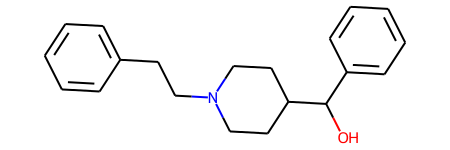

In [8297]:
M12 = mol_list [11]
M12

In [8298]:
M13 = mol_list [12]
M13

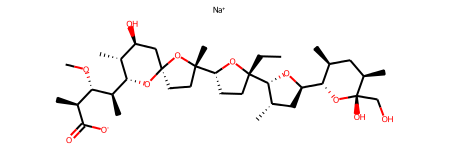

In [8299]:
M14 = mol_list [13]
M14

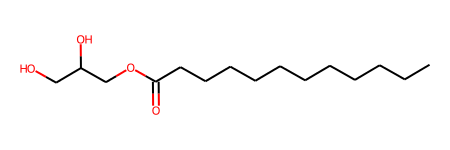

In [8300]:
M15 = mol_list [14]
M15

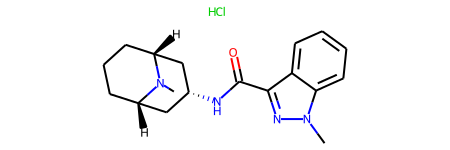

In [8301]:
M16 = mol_list [15]
M16

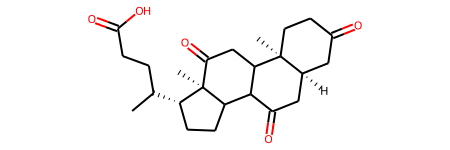

In [8302]:
M17 = mol_list [16]
M17

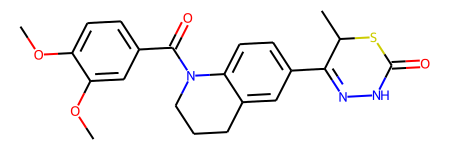

In [8303]:
M18 = mol_list [17]
M18

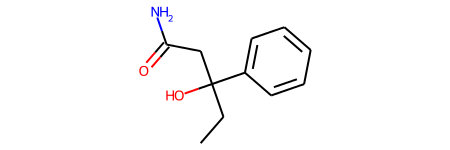

In [8304]:
M19 = mol_list [18]
M19

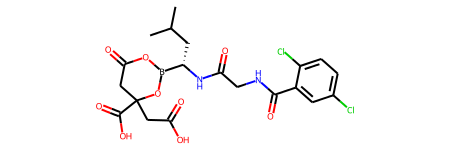

In [8305]:
M20 = mol_list [19]
M20

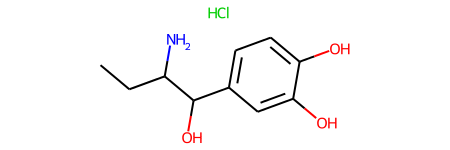

In [8306]:
M21 = mol_list [20]
M21

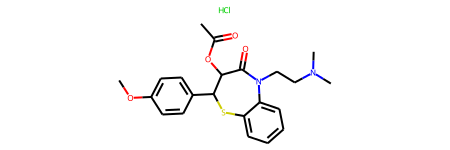

In [8307]:
M22 = mol_list [21]
M22

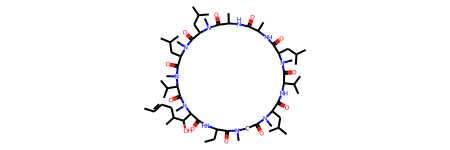

In [8308]:
M23 = mol_list [22]
M23

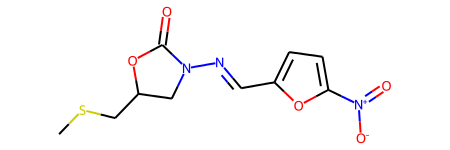

In [8309]:
M24 = mol_list [23]
M24

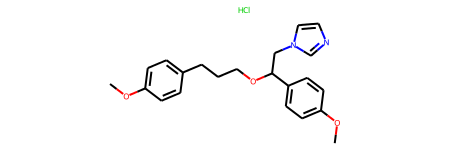

In [8310]:
M25 = mol_list [24]
M25

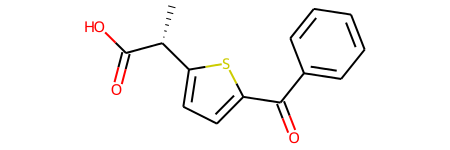

In [8311]:
M26 = mol_list [25]
M26

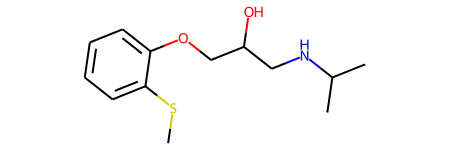

In [8312]:
M27 = mol_list [26]
M27

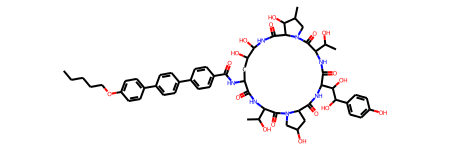

In [8313]:
M28 = mol_list [27]
M28

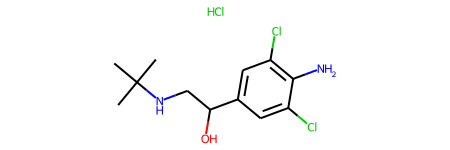

In [8314]:
M29 = mol_list [28]
M29

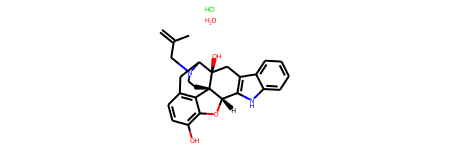

In [8315]:
M30 = mol_list [29]
M30

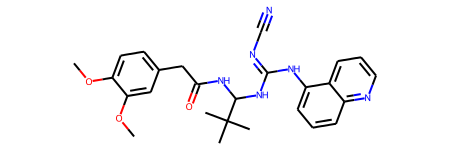

In [8316]:
M31 = mol_list [30]
M31

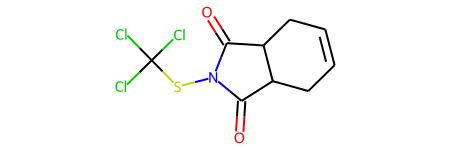

In [8317]:
M32 = mol_list [31]
M32

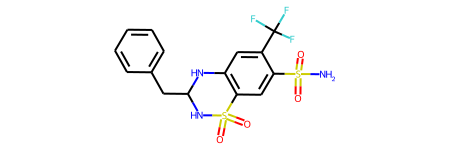

In [8318]:
M33 = mol_list [32]
M33

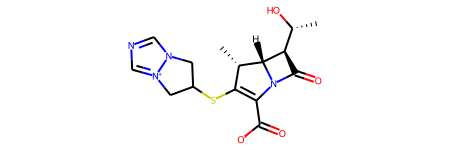

In [8319]:
M34 = mol_list [33]
M34

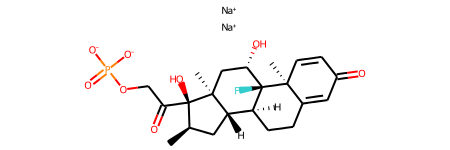

In [8320]:
M35 = mol_list [34]
M35

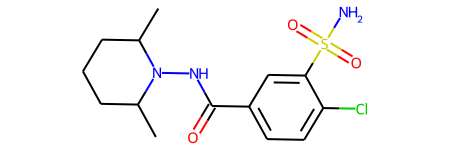

In [8321]:
M36 = mol_list [35]
M36

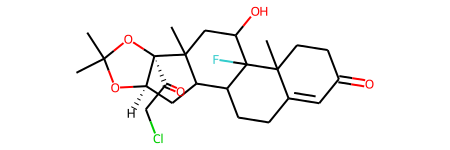

In [8322]:
M37= mol_list [36]
M37

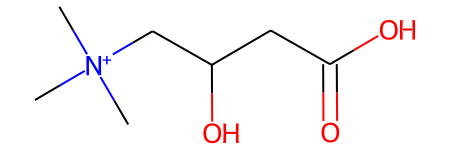

In [8323]:
M38= mol_list [37]
M38

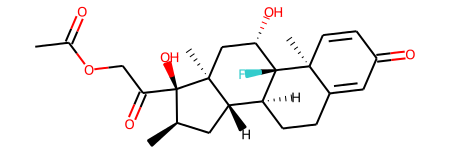

In [8324]:
M39= mol_list [38]
M39

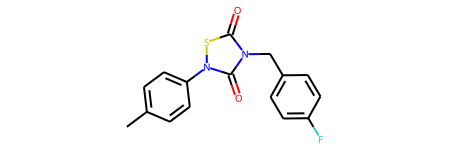

In [8325]:
M40= mol_list [39]
M40

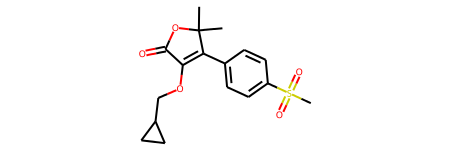

In [8326]:
M41= mol_list [40]
M41

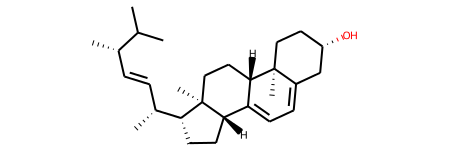

In [8327]:
M42= mol_list [41]
M42

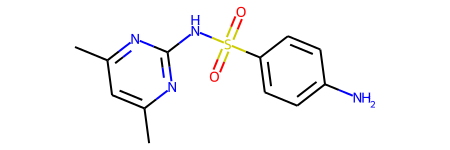

In [8328]:
M43= mol_list [42]
M43

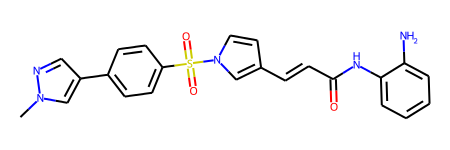

In [8329]:
M44= mol_list [43]
M44

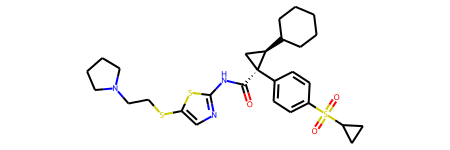

In [8330]:
M45= mol_list [44]
M45

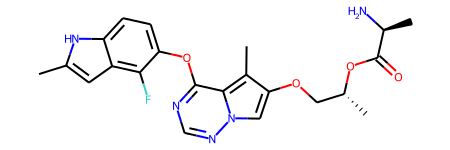

In [8331]:
M46= mol_list [45]
M46

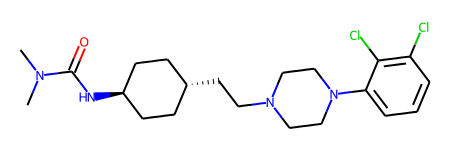

In [8332]:
M47= mol_list [46]
M47

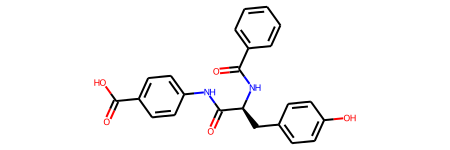

In [8333]:
M48= mol_list [47]
M48

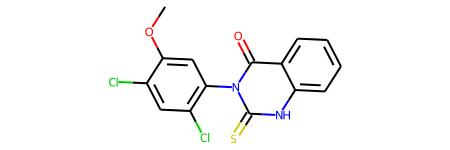

In [8334]:
M49= mol_list [48]
M49

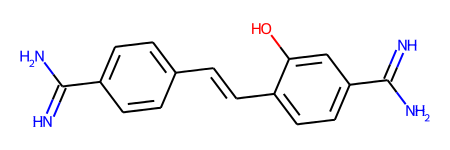

In [8335]:
M50= mol_list [49]
M50

In [8336]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[1,
 3,
 13,
 33,
 79,
 80,
 118,
 144,
 170,
 199,
 210,
 222,
 233,
 249,
 299,
 310,
 356,
 451,
 463,
 489,
 492,
 512,
 578,
 583,
 610,
 614,
 656,
 695,
 719,
 722,
 726,
 730,
 740,
 807,
 820,
 823,
 841,
 849,
 875,
 882,
 897,
 923,
 946,
 953,
 966,
 1019]

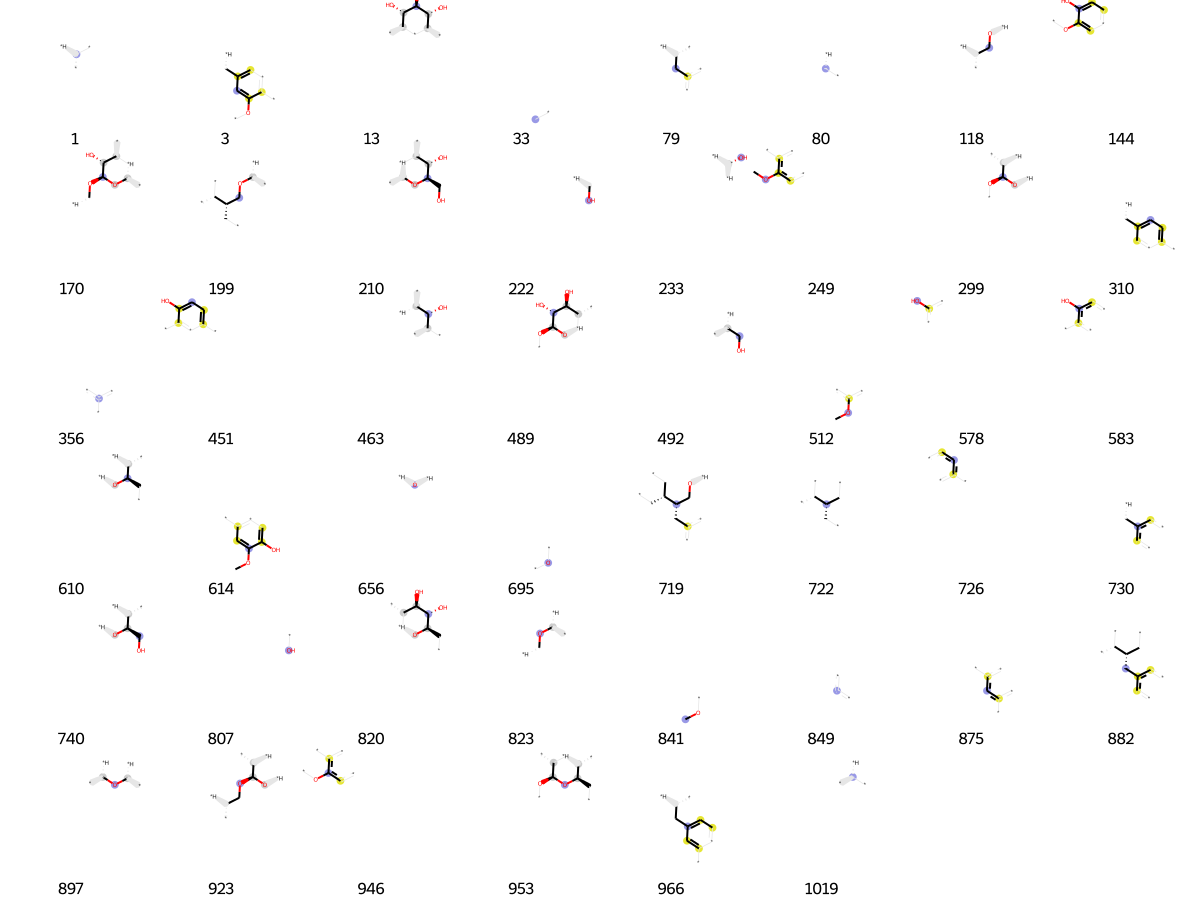

In [8337]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [8338]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[64,
 73,
 90,
 119,
 175,
 176,
 180,
 185,
 289,
 298,
 343,
 356,
 378,
 428,
 535,
 552,
 585,
 607,
 675,
 721,
 726,
 745,
 759,
 788,
 831,
 849,
 872,
 892,
 969,
 980]

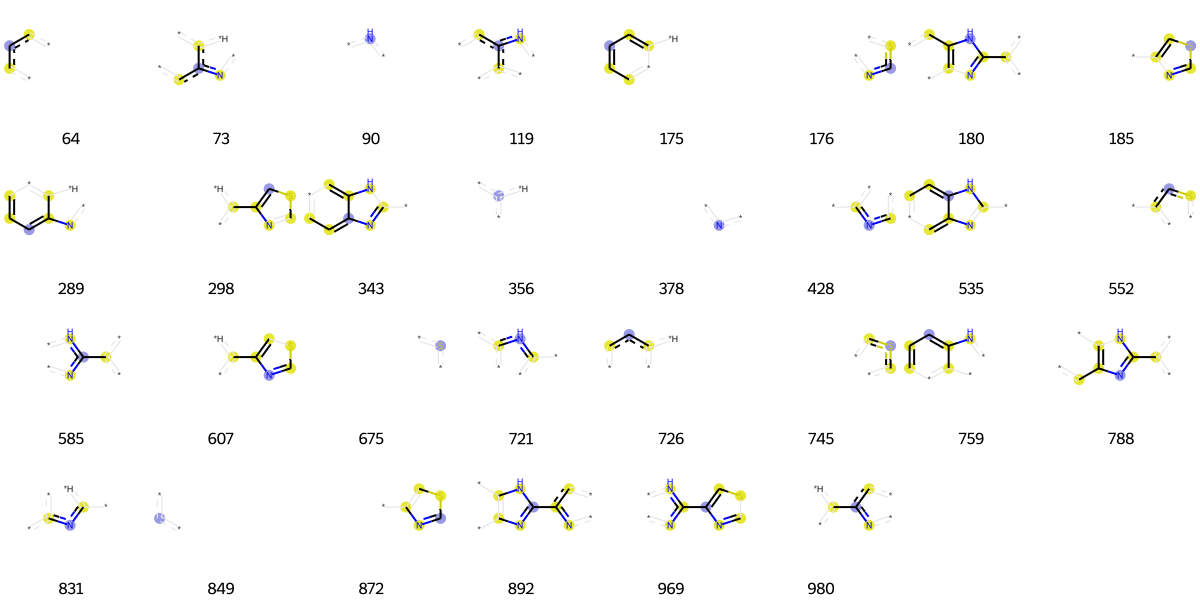

In [8339]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [8340]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[23,
 64,
 80,
 110,
 128,
 143,
 147,
 176,
 200,
 209,
 255,
 283,
 288,
 350,
 356,
 366,
 389,
 392,
 442,
 452,
 456,
 474,
 494,
 514,
 561,
 568,
 583,
 650,
 656,
 659,
 691,
 726,
 787,
 807,
 833,
 849,
 875,
 893,
 902,
 910,
 954,
 967]

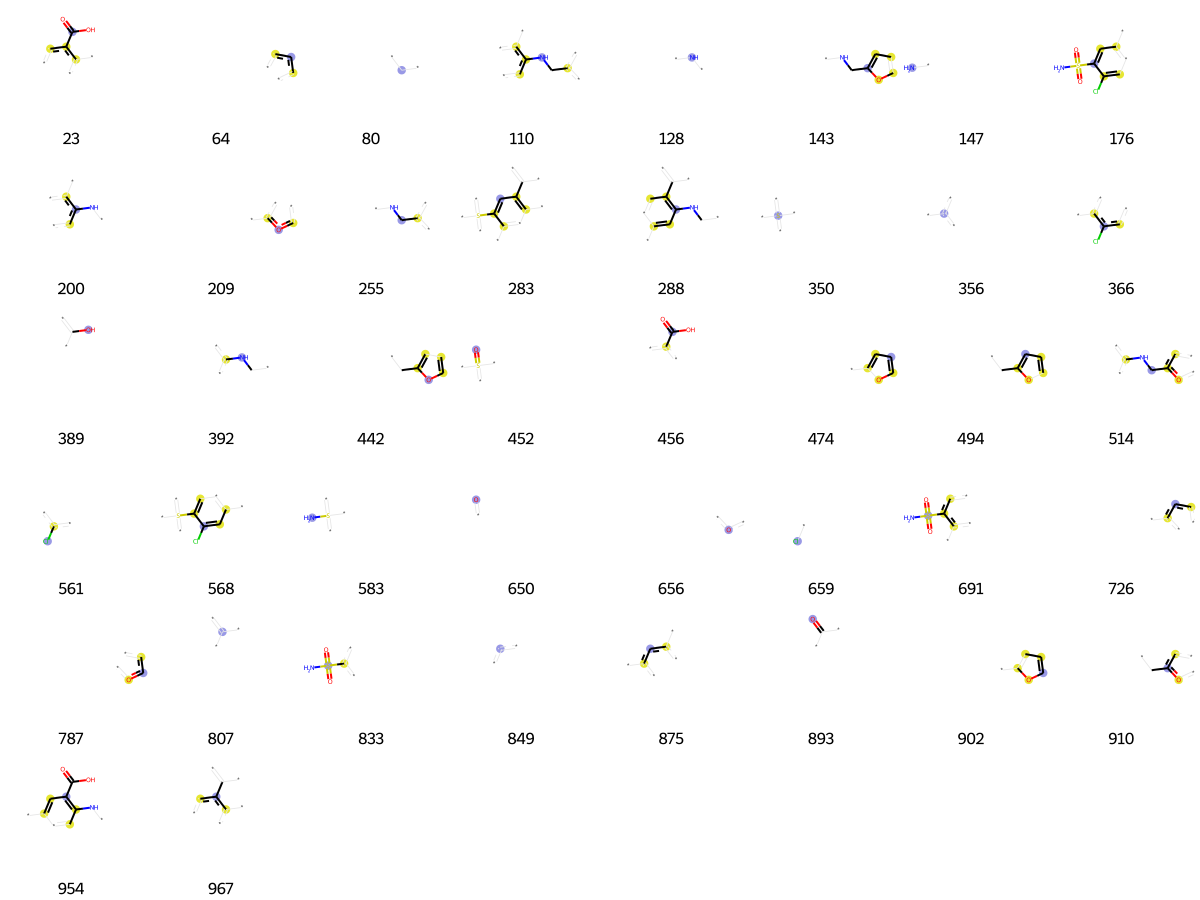

In [8341]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [8342]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[33,
 36,
 57,
 80,
 84,
 102,
 105,
 119,
 127,
 138,
 182,
 184,
 186,
 242,
 243,
 249,
 250,
 253,
 292,
 294,
 301,
 314,
 345,
 356,
 362,
 375,
 408,
 420,
 436,
 453,
 455,
 519,
 540,
 549,
 559,
 562,
 591,
 593,
 622,
 650,
 682,
 695,
 714,
 717,
 766,
 794,
 807,
 841,
 849,
 887,
 893,
 926,
 927,
 1019]

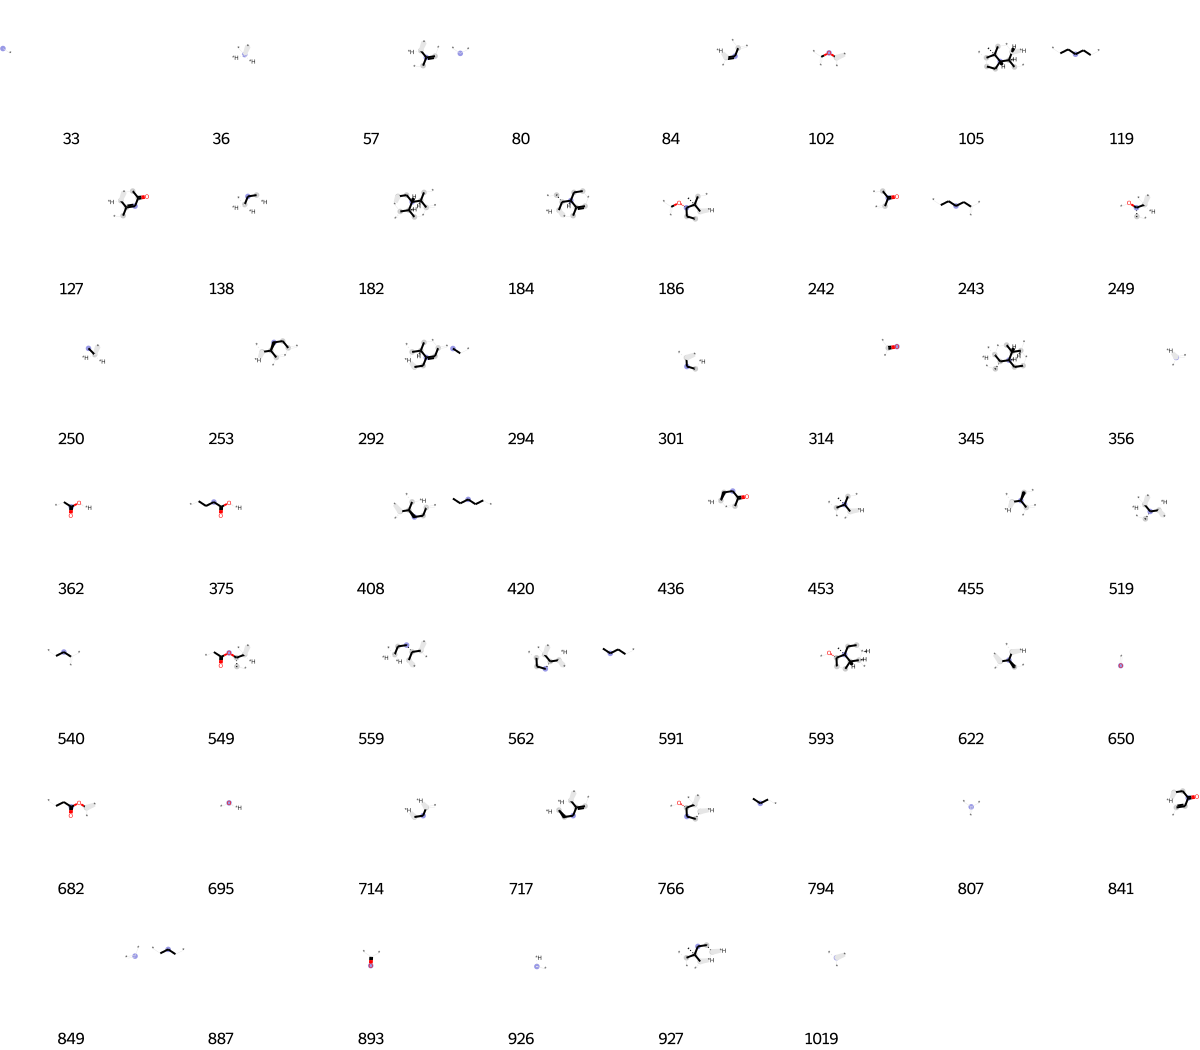

In [8343]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [8344]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[1,
 4,
 13,
 33,
 59,
 69,
 94,
 99,
 112,
 125,
 128,
 149,
 165,
 184,
 216,
 283,
 284,
 356,
 360,
 367,
 378,
 389,
 398,
 408,
 412,
 414,
 428,
 447,
 558,
 561,
 611,
 659,
 664,
 694,
 695,
 698,
 700,
 703,
 713,
 725,
 726,
 787,
 816,
 831,
 841,
 842,
 849,
 851,
 875,
 885,
 932,
 935,
 946,
 972,
 989]

In [8345]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[59,
 114,
 144,
 147,
 193,
 228,
 280,
 322,
 356,
 387,
 393,
 429,
 433,
 593,
 641,
 695,
 718,
 726,
 780,
 849,
 863,
 888,
 904,
 1004]

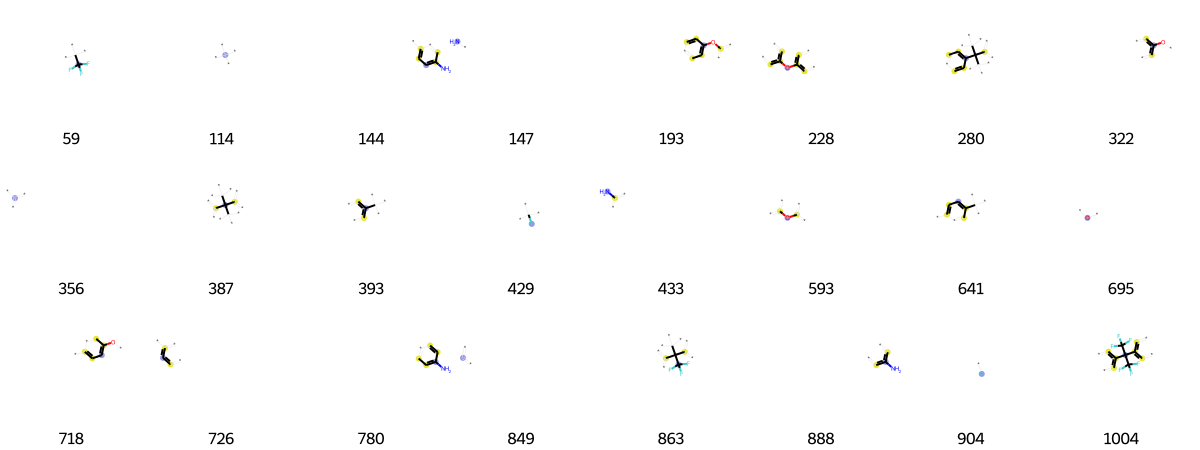

In [8346]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [8347]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[1,
 7,
 8,
 16,
 33,
 36,
 71,
 80,
 84,
 88,
 105,
 138,
 146,
 182,
 195,
 242,
 243,
 250,
 262,
 283,
 301,
 314,
 356,
 406,
 408,
 453,
 479,
 490,
 504,
 519,
 529,
 531,
 562,
 622,
 650,
 669,
 714,
 739,
 753,
 784,
 823,
 836,
 841,
 849,
 860,
 887,
 926,
 927,
 1019]

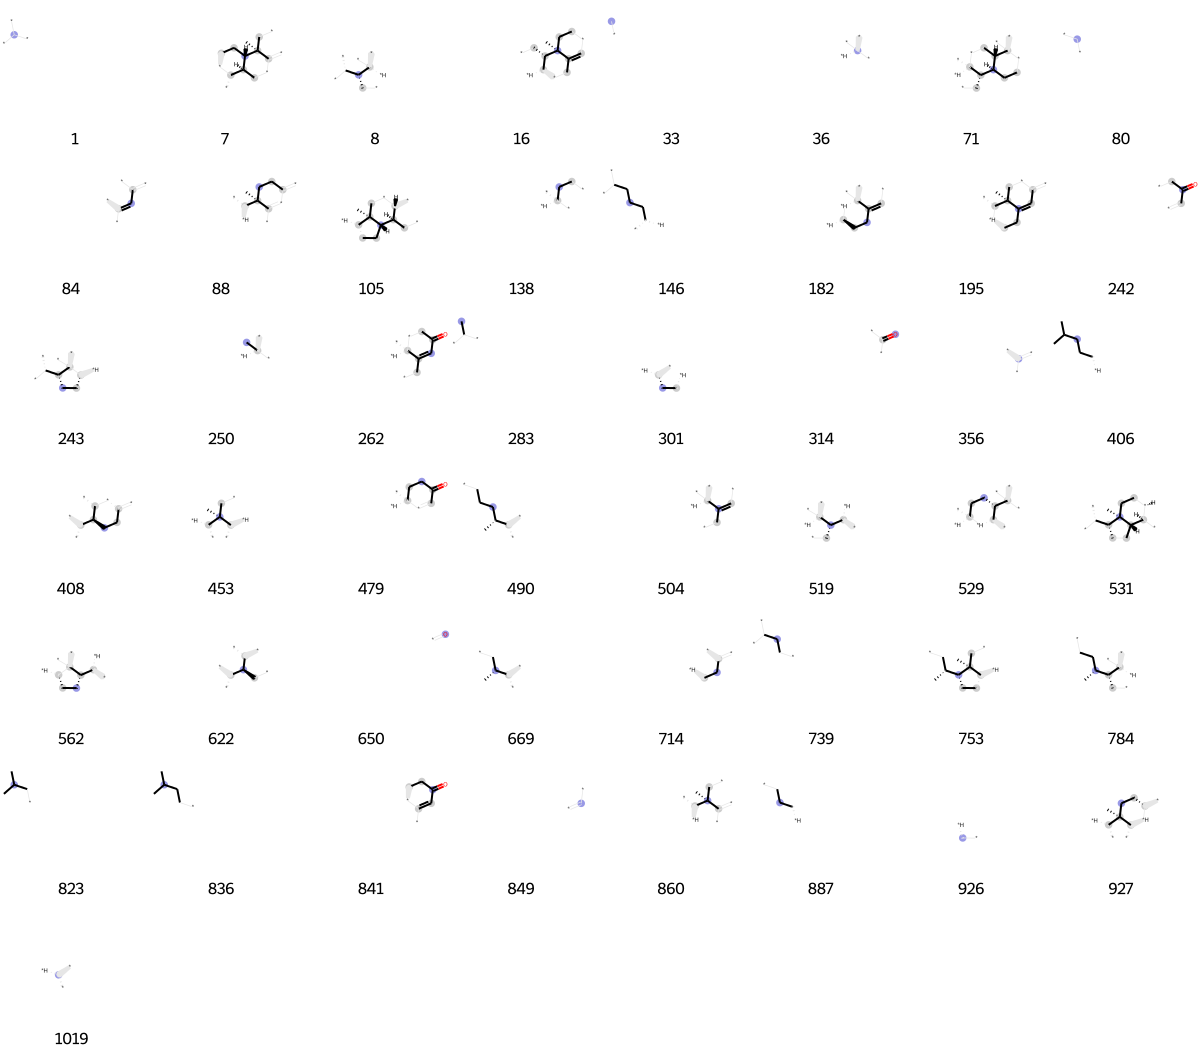

In [8348]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [8349]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[22,
 33,
 36,
 79,
 80,
 84,
 86,
 93,
 102,
 138,
 184,
 232,
 249,
 250,
 263,
 267,
 301,
 314,
 356,
 362,
 389,
 399,
 412,
 414,
 418,
 423,
 425,
 435,
 453,
 470,
 478,
 516,
 522,
 540,
 549,
 555,
 558,
 559,
 650,
 679,
 682,
 695,
 713,
 729,
 759,
 781,
 807,
 829,
 846,
 849,
 855,
 857,
 872,
 893,
 904,
 926,
 927,
 992,
 999,
 1019]

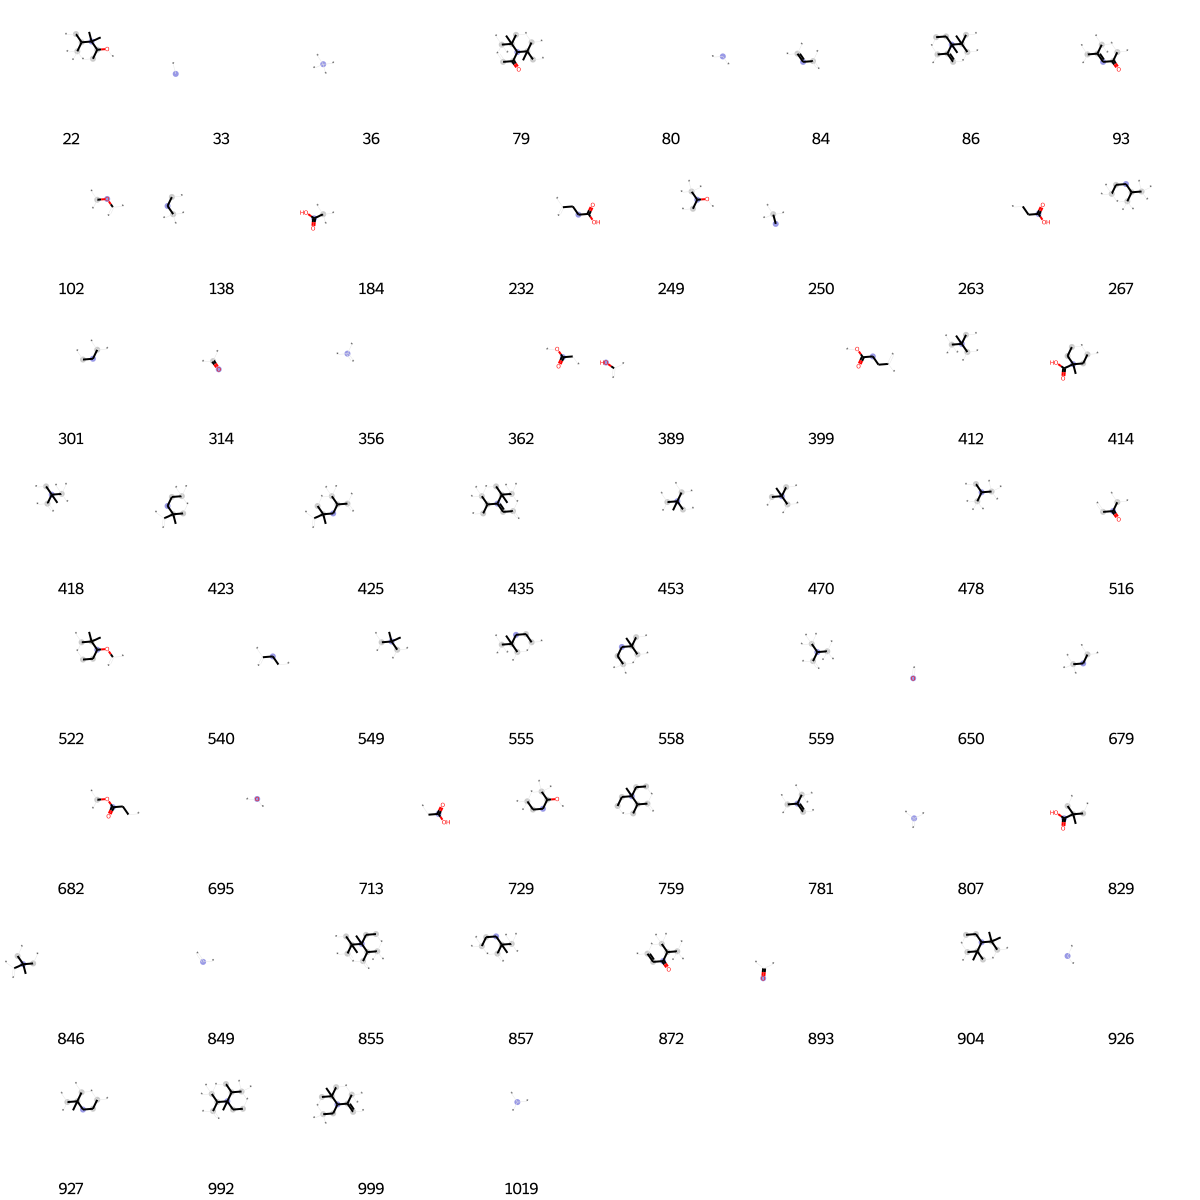

In [8350]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [8351]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[32,
 33,
 128,
 140,
 162,
 174,
 216,
 228,
 245,
 332,
 356,
 378,
 385,
 561,
 650,
 656,
 659,
 675,
 683,
 792,
 807,
 849,
 893,
 1017]

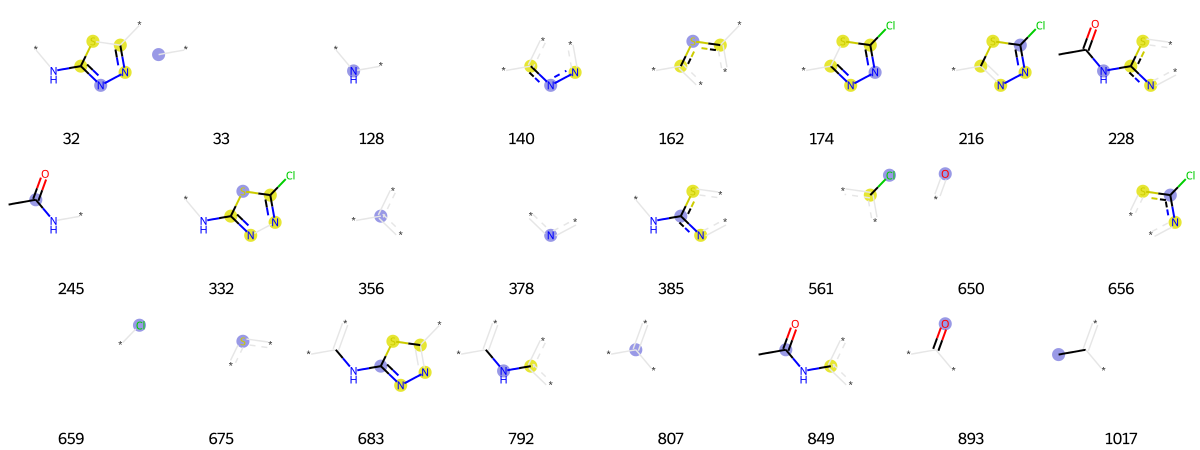

In [8352]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [8353]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[33,
 46,
 64,
 75,
 128,
 131,
 175,
 197,
 202,
 203,
 288,
 289,
 315,
 322,
 356,
 378,
 381,
 394,
 428,
 448,
 472,
 486,
 499,
 512,
 554,
 578,
 580,
 650,
 656,
 667,
 695,
 718,
 725,
 726,
 745,
 781,
 784,
 792,
 807,
 820,
 830,
 831,
 841,
 842,
 846,
 847,
 849,
 870,
 875,
 893,
 938,
 967,
 983,
 993]

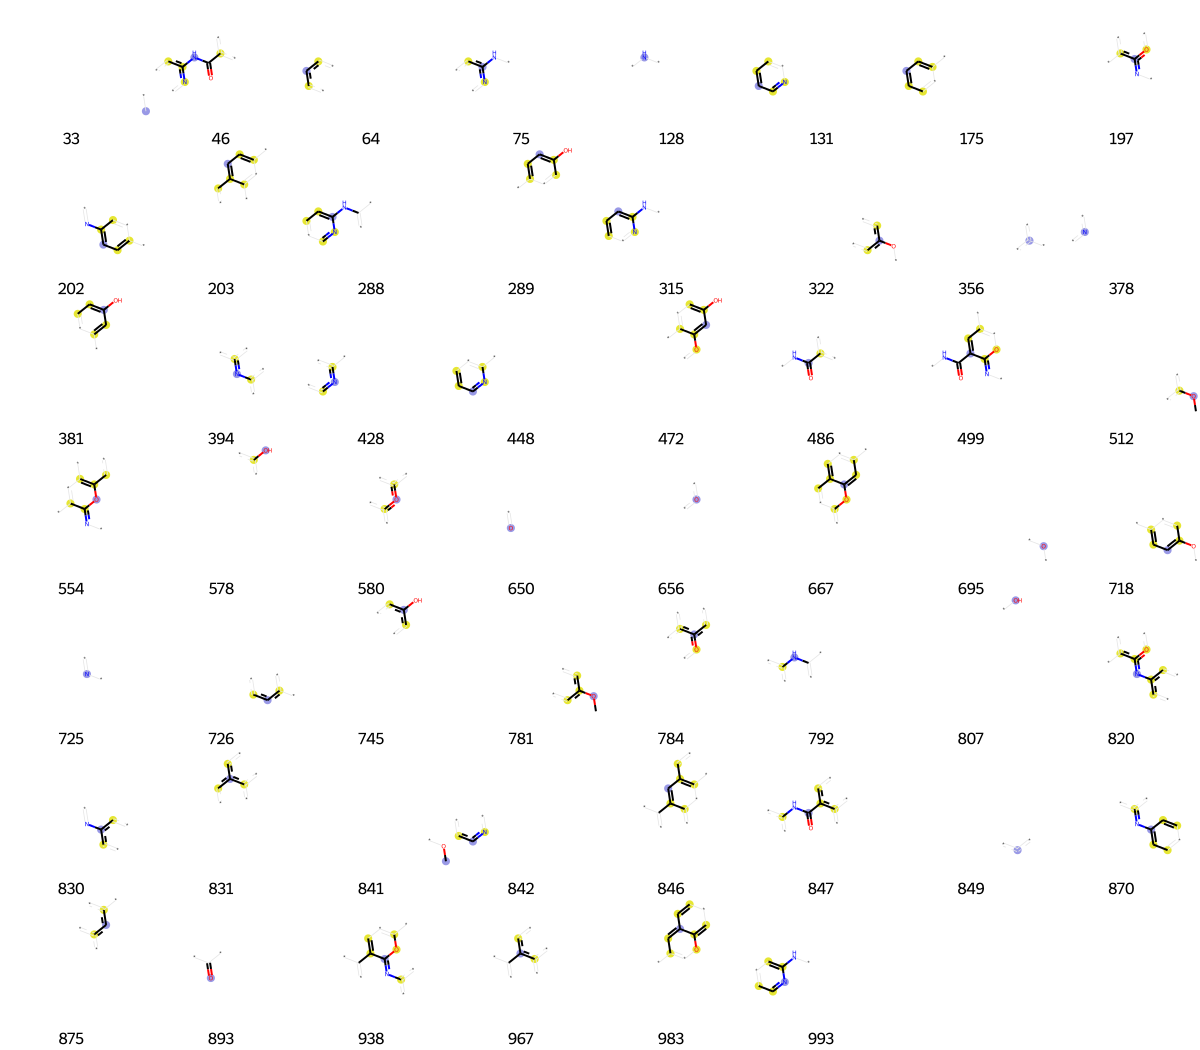

In [8354]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [8355]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[33,
 67,
 205,
 233,
 356,
 381,
 407,
 417,
 419,
 456,
 475,
 496,
 523,
 578,
 583,
 650,
 656,
 687,
 726,
 796,
 801,
 807,
 849,
 875,
 893,
 926,
 935,
 950,
 954,
 967,
 1014,
 1017]

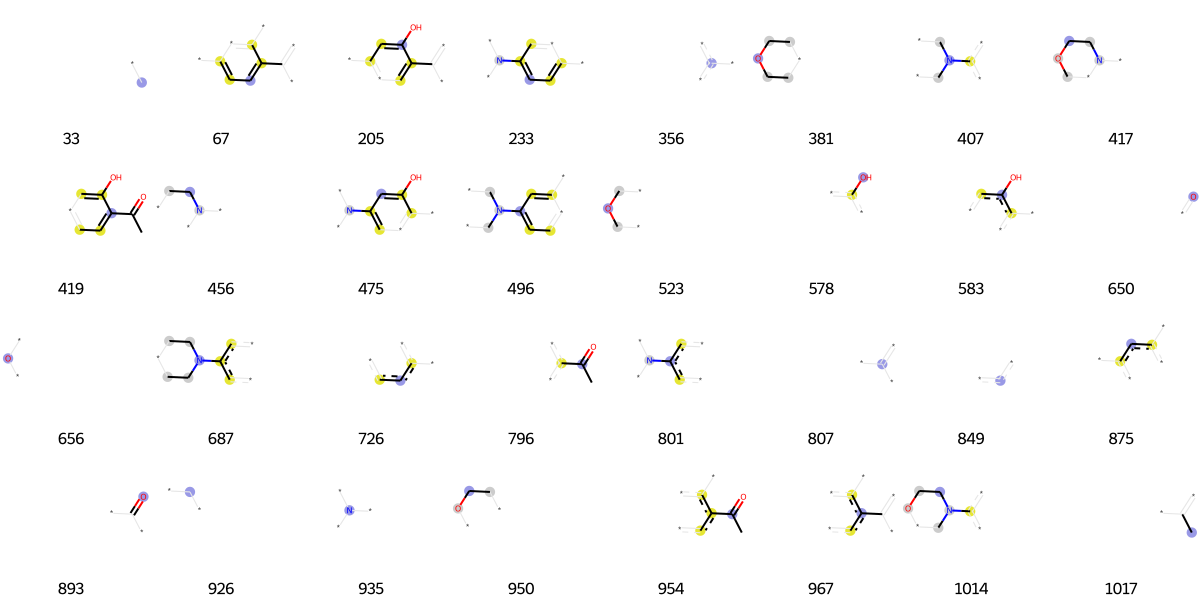

In [8356]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [8357]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 21,
 42,
 64,
 80,
 100,
 121,
 175,
 218,
 219,
 227,
 237,
 294,
 301,
 338,
 341,
 356,
 389,
 456,
 458,
 557,
 584,
 662,
 726,
 730,
 767,
 774,
 807,
 849,
 926,
 935,
 954,
 1019]

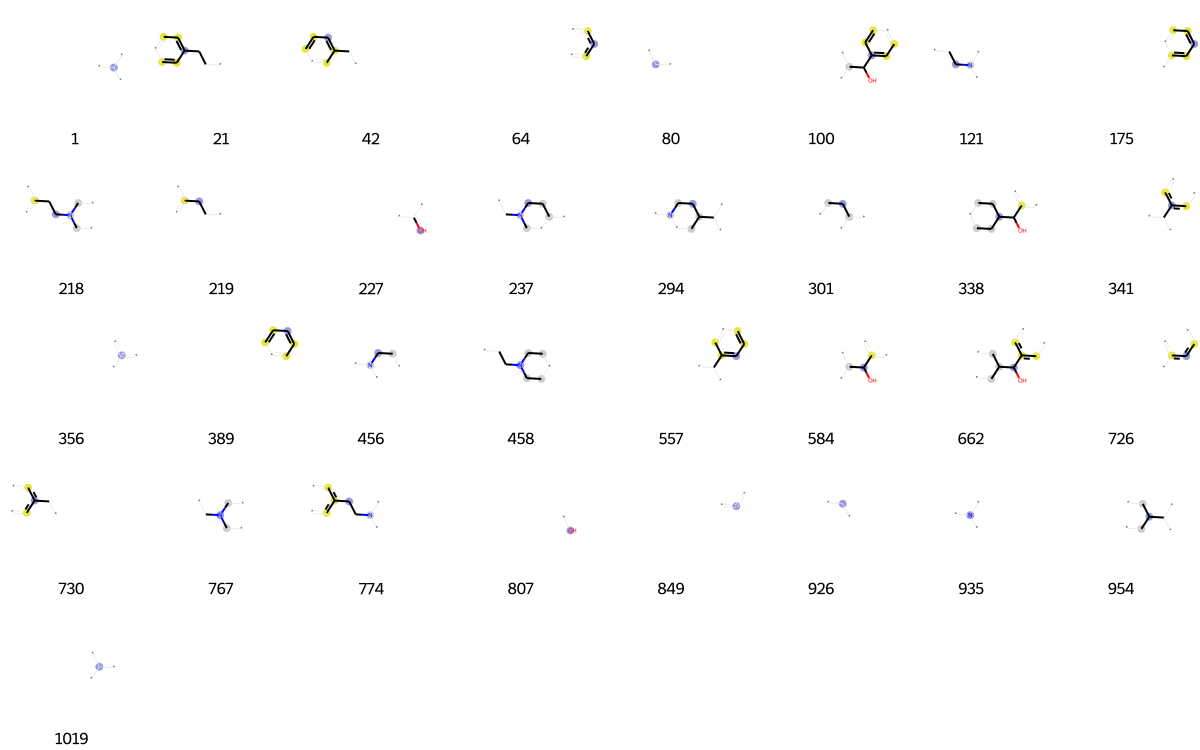

In [8358]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [8359]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[1,
 33,
 36,
 45,
 46,
 80,
 84,
 104,
 130,
 138,
 139,
 152,
 162,
 176,
 178,
 189,
 202,
 215,
 220,
 221,
 222,
 233,
 238,
 250,
 262,
 268,
 283,
 284,
 285,
 294,
 301,
 327,
 336,
 337,
 389,
 419,
 439,
 440,
 446,
 457,
 490,
 492,
 497,
 517,
 579,
 650,
 656,
 674,
 679,
 695,
 706,
 708,
 715,
 755,
 775,
 795,
 806,
 807,
 808,
 833,
 835,
 841,
 849,
 851,
 861,
 867,
 890,
 891,
 893,
 897,
 913,
 926,
 935,
 1002,
 1019,
 1020]

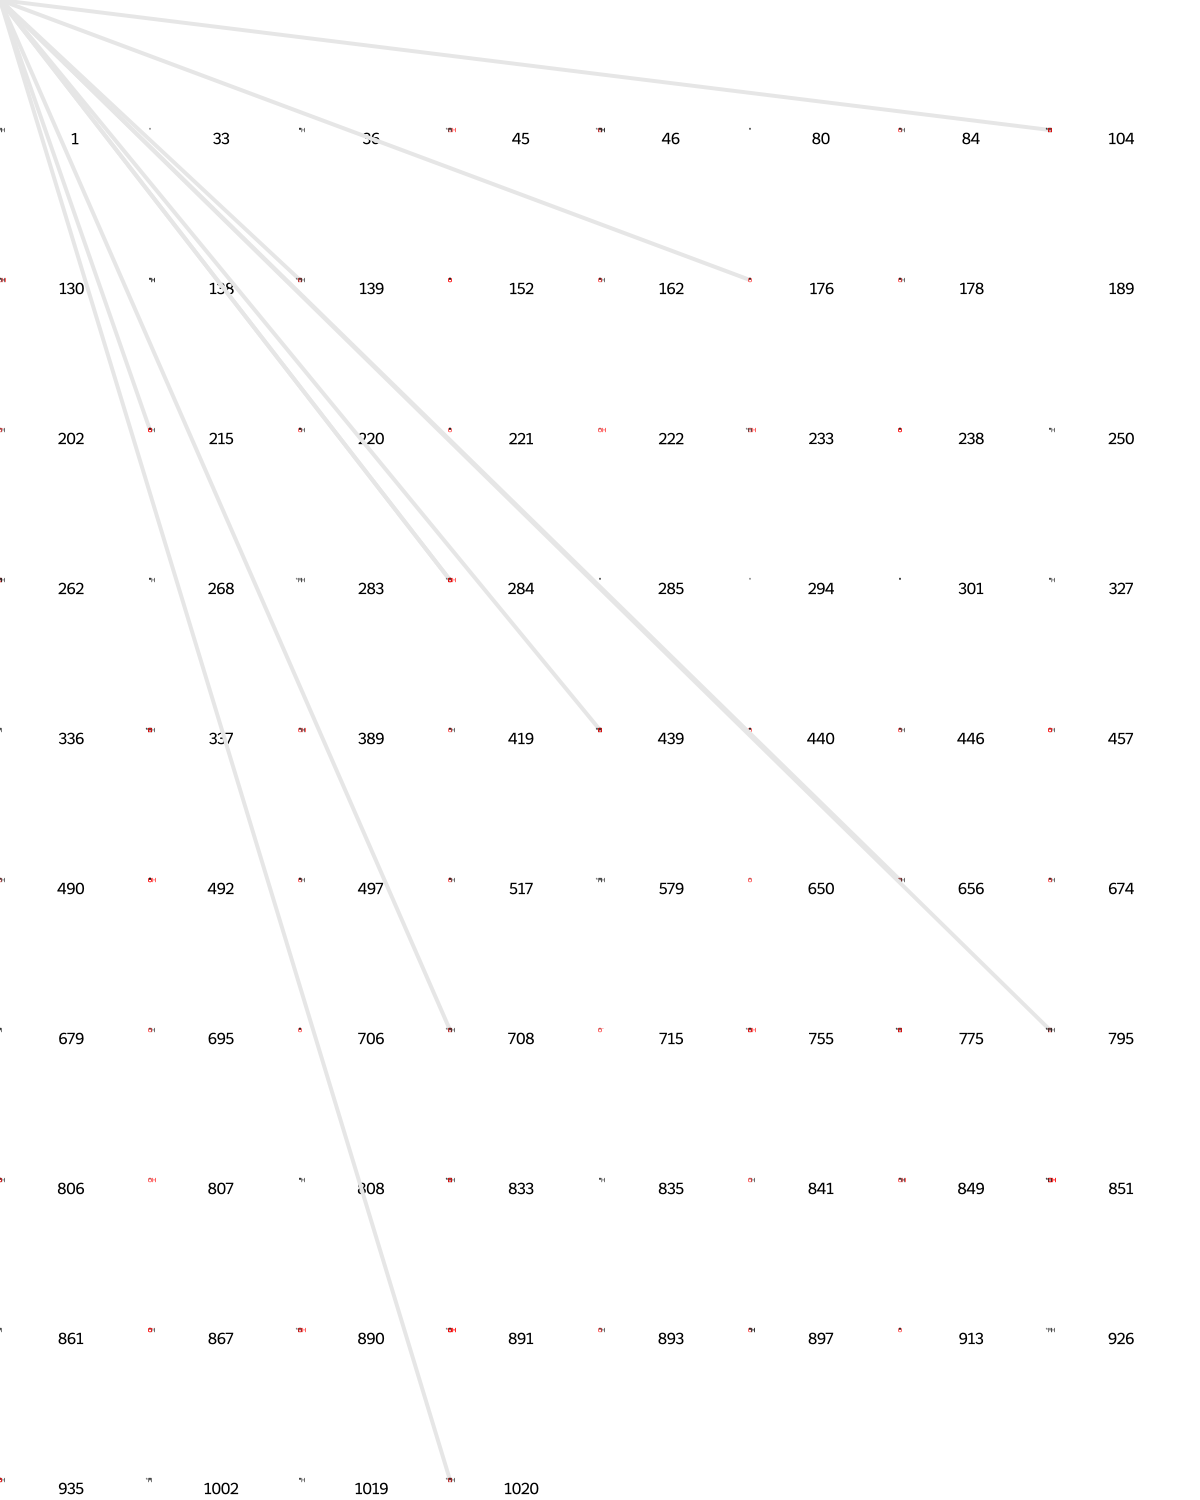

In [8360]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [8361]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 33,
 80,
 118,
 119,
 147,
 222,
 227,
 243,
 294,
 362,
 375,
 420,
 482,
 523,
 526,
 540,
 591,
 650,
 677,
 695,
 729,
 794,
 807,
 887,
 893,
 953,
 1014]

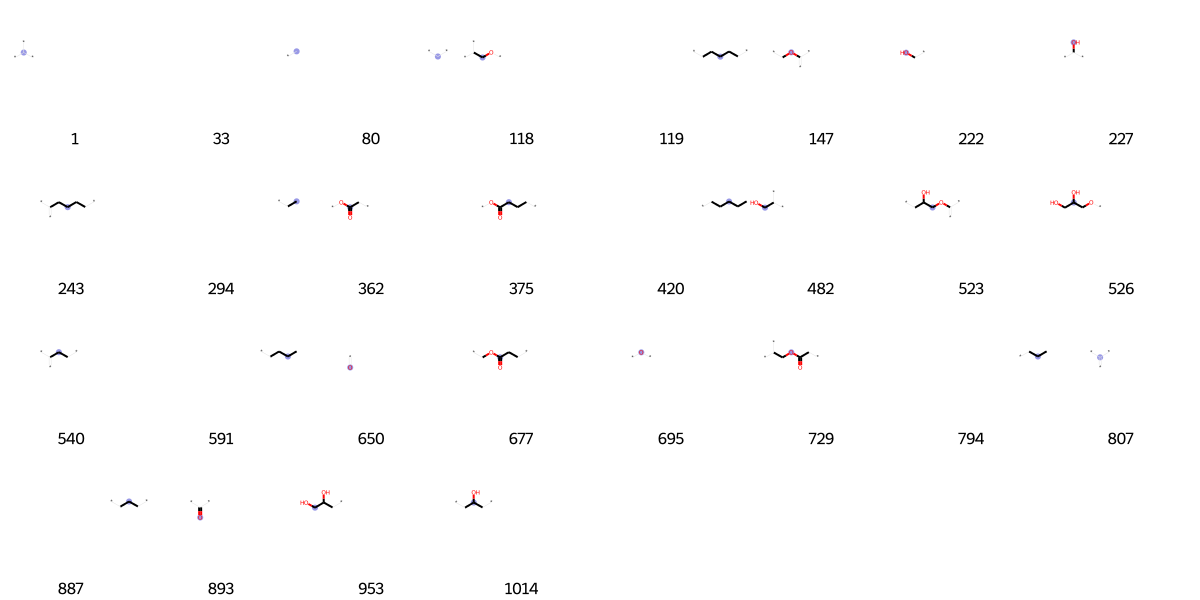

In [8362]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [8363]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1,
 4,
 26,
 33,
 39,
 45,
 64,
 81,
 121,
 128,
 175,
 261,
 268,
 301,
 333,
 356,
 378,
 387,
 486,
 490,
 514,
 549,
 554,
 592,
 610,
 650,
 667,
 726,
 807,
 832,
 837,
 838,
 849,
 886,
 893,
 899,
 910,
 926,
 932,
 935,
 968,
 969,
 1017,
 1019]

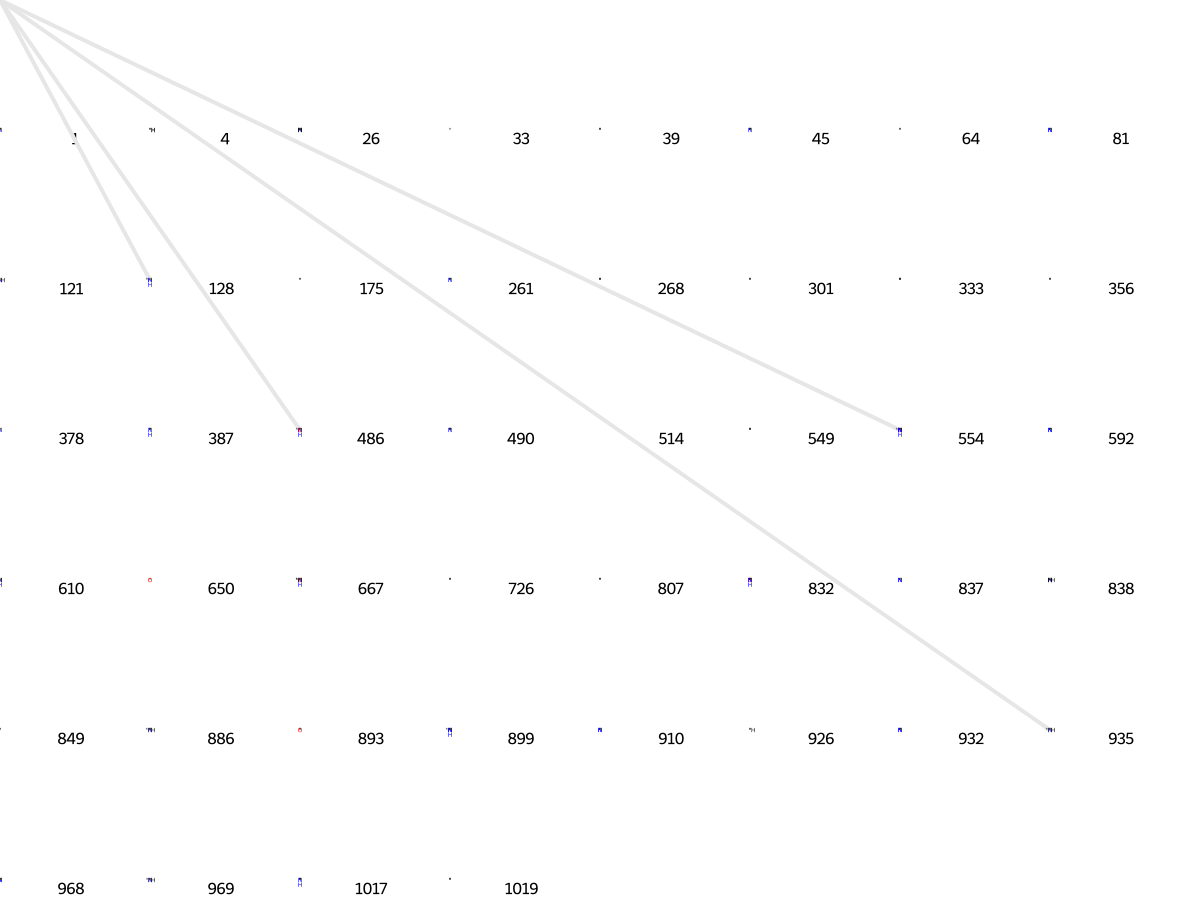

In [8364]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [8365]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[1,
 8,
 29,
 33,
 34,
 36,
 67,
 68,
 80,
 120,
 134,
 138,
 144,
 225,
 231,
 243,
 250,
 263,
 283,
 301,
 314,
 329,
 356,
 366,
 370,
 389,
 433,
 437,
 453,
 476,
 484,
 519,
 528,
 540,
 562,
 650,
 668,
 669,
 713,
 714,
 739,
 764,
 777,
 784,
 791,
 807,
 831,
 893,
 926,
 955,
 1019]

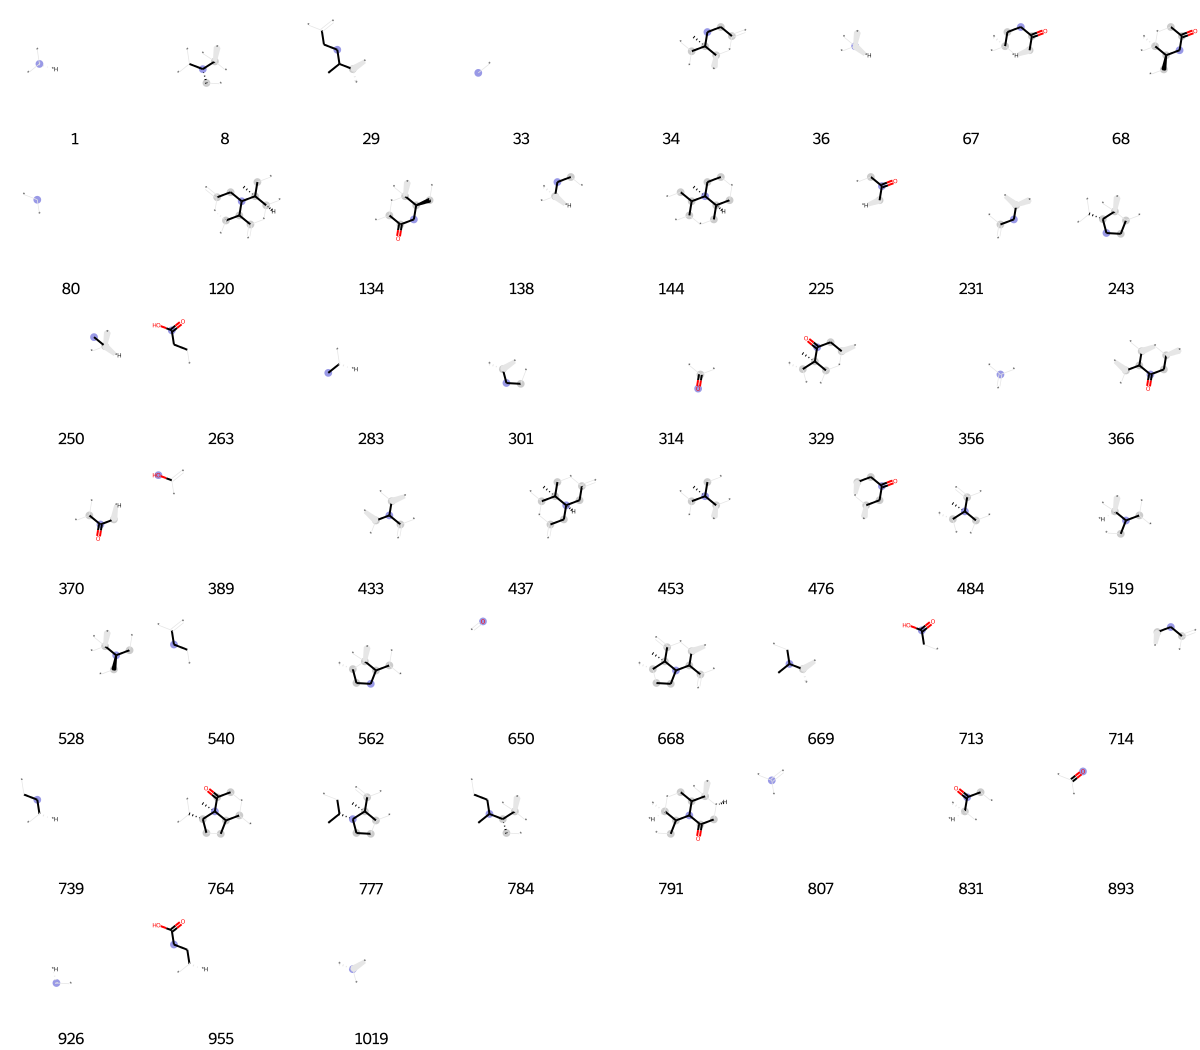

In [8366]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [8367]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[4,
 6,
 33,
 90,
 94,
 114,
 136,
 140,
 146,
 191,
 212,
 221,
 249,
 271,
 285,
 314,
 356,
 360,
 361,
 362,
 363,
 378,
 419,
 424,
 428,
 456,
 479,
 480,
 512,
 515,
 516,
 556,
 603,
 618,
 626,
 650,
 672,
 673,
 675,
 690,
 695,
 714,
 726,
 774,
 807,
 841,
 849,
 871,
 875,
 887,
 891,
 893,
 896,
 903,
 918,
 926,
 935,
 946,
 1019]

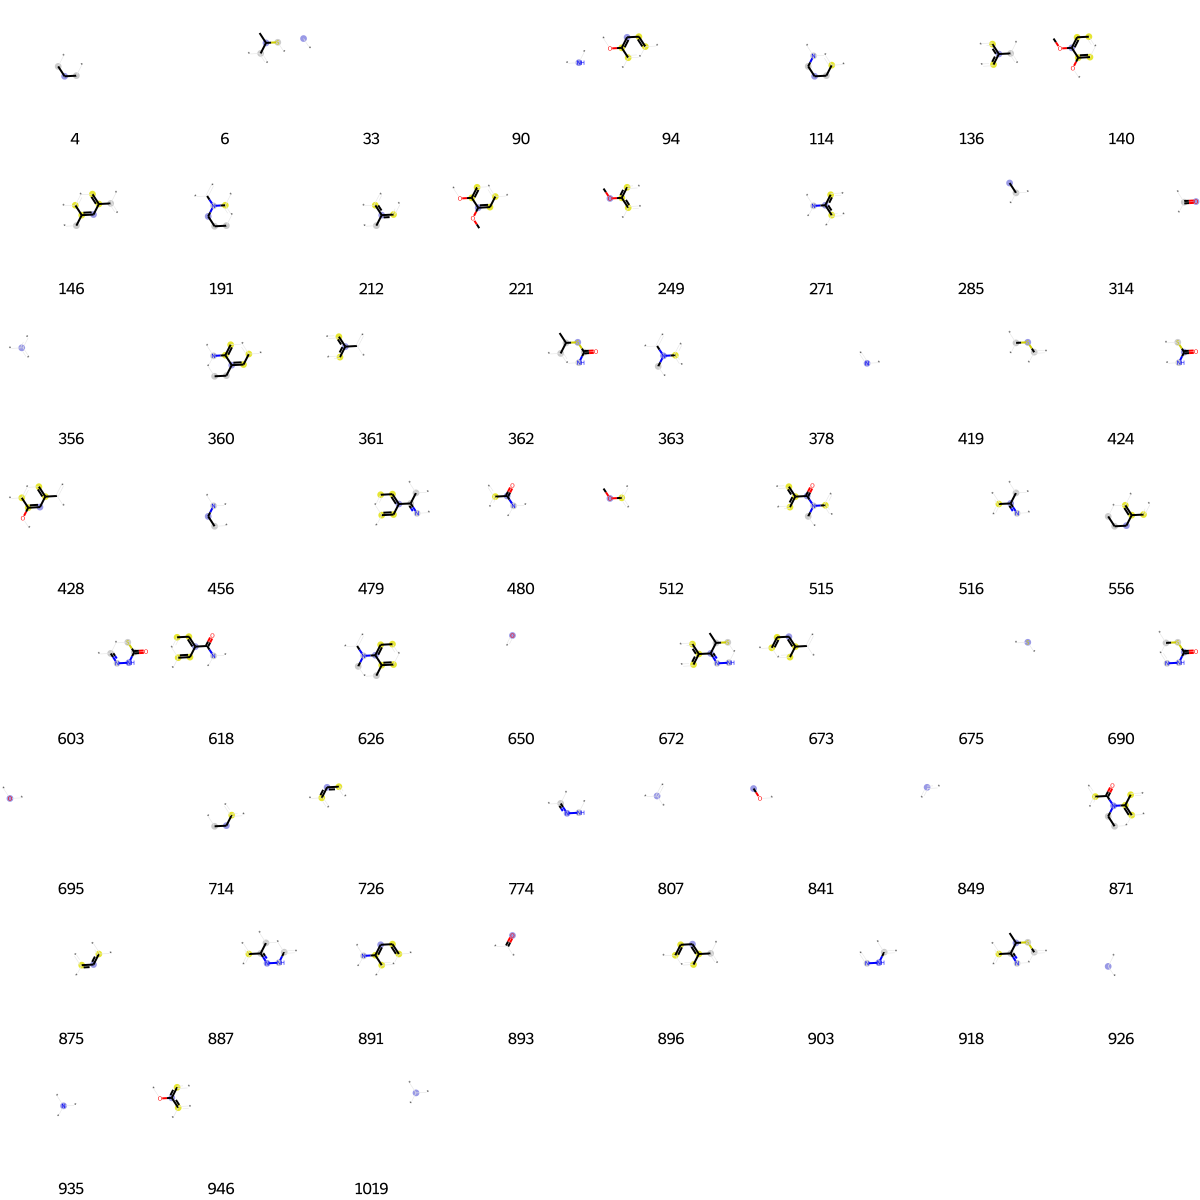

In [8368]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [8369]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[33,
 37,
 64,
 80,
 86,
 114,
 140,
 147,
 157,
 175,
 277,
 294,
 295,
 356,
 389,
 393,
 473,
 650,
 692,
 726,
 807,
 849,
 874,
 884,
 893,
 915,
 993]

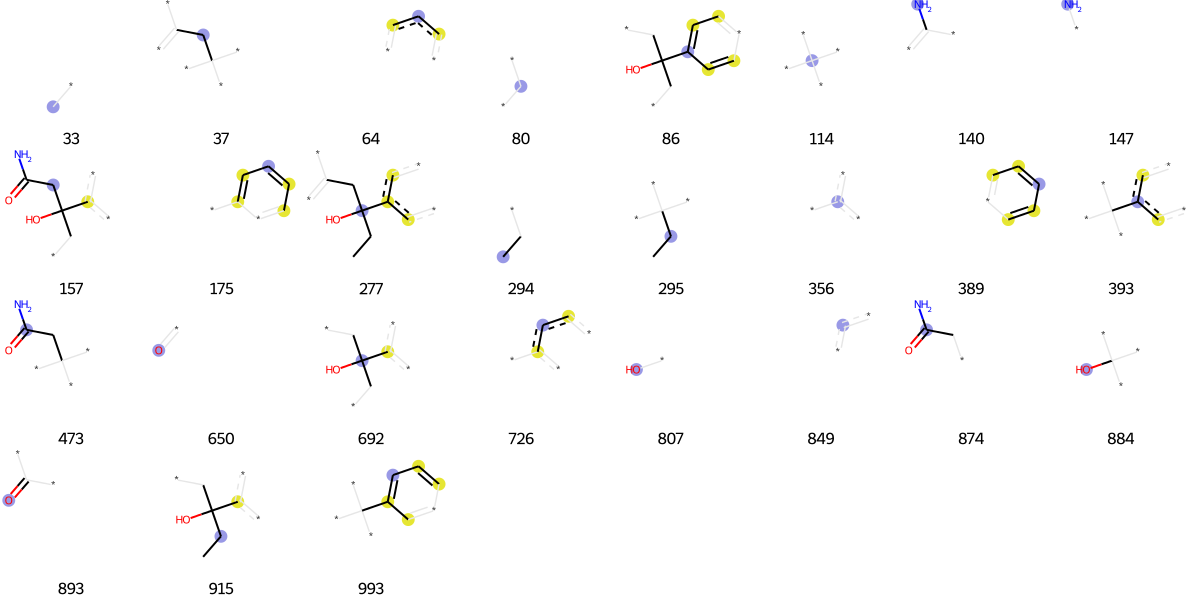

In [8370]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [8371]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[0,
 1,
 33,
 36,
 41,
 80,
 92,
 117,
 128,
 165,
 166,
 180,
 184,
 185,
 192,
 197,
 210,
 216,
 283,
 293,
 314,
 352,
 356,
 366,
 389,
 416,
 427,
 486,
 509,
 524,
 561,
 619,
 625,
 634,
 646,
 650,
 656,
 659,
 666,
 680,
 690,
 691,
 713,
 726,
 736,
 759,
 774,
 807,
 816,
 823,
 830,
 838,
 849,
 875,
 893,
 901,
 926,
 940,
 967,
 970,
 1004]

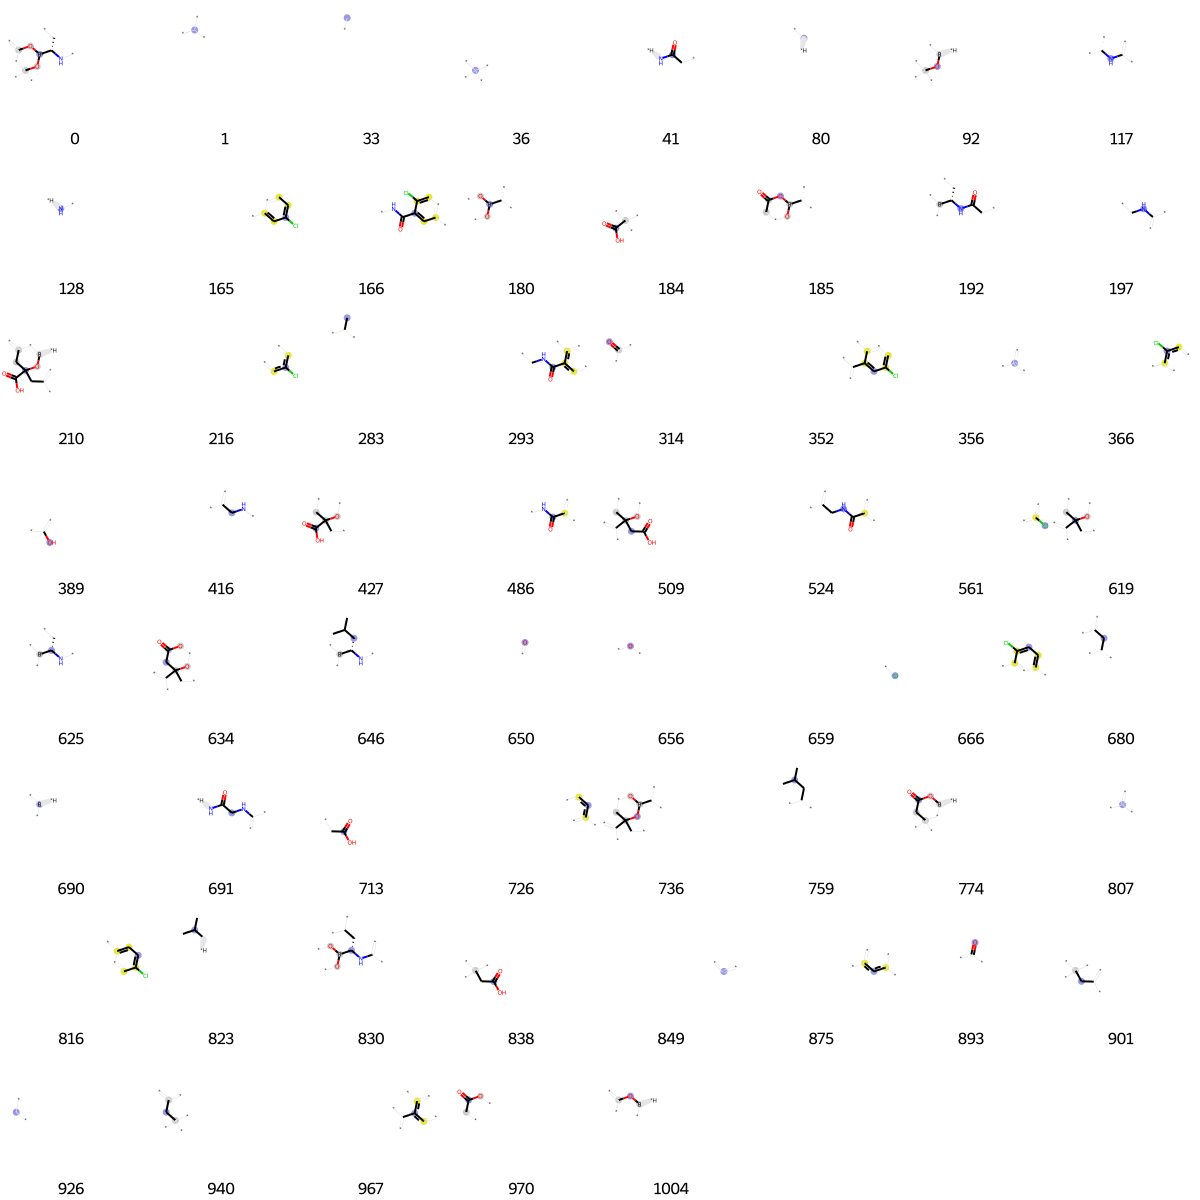

In [8372]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [8373]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[1,
 33,
 80,
 147,
 193,
 220,
 227,
 294,
 315,
 341,
 356,
 451,
 510,
 514,
 520,
 578,
 583,
 589,
 645,
 726,
 749,
 760,
 786,
 807,
 829,
 849,
 875,
 980]

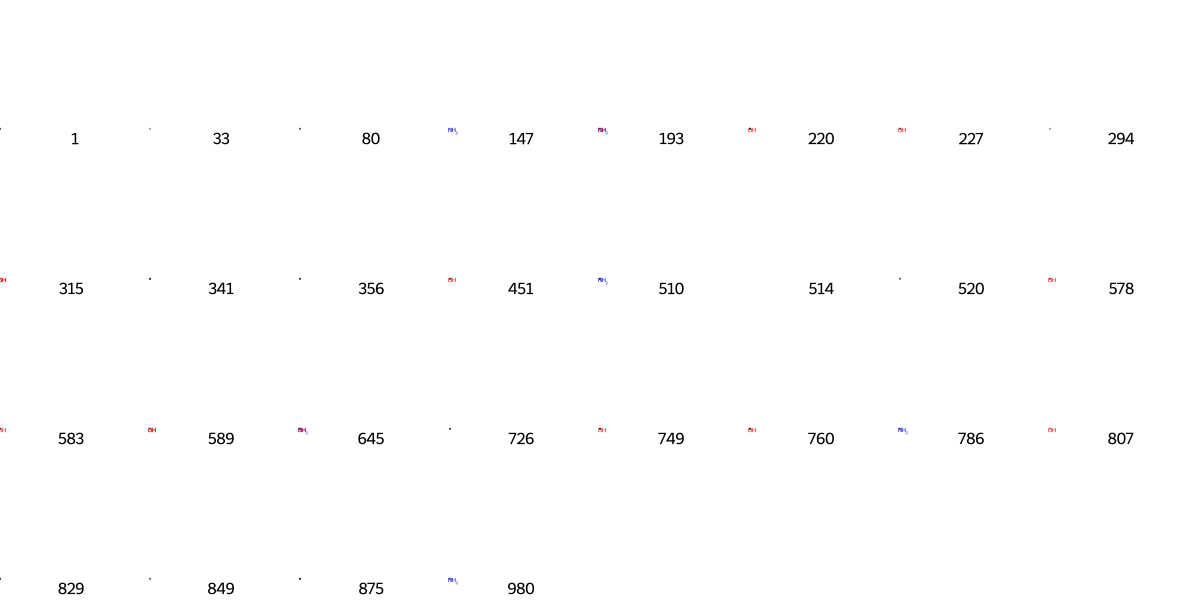

In [8374]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [8375]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[5,
 7,
 11,
 21,
 33,
 35,
 64,
 73,
 80,
 102,
 121,
 139,
 143,
 175,
 255,
 271,
 314,
 322,
 327,
 356,
 397,
 419,
 504,
 507,
 512,
 514,
 521,
 588,
 623,
 650,
 652,
 675,
 693,
 695,
 718,
 726,
 744,
 748,
 779,
 781,
 807,
 831,
 841,
 849,
 881,
 890,
 893,
 921,
 927,
 935,
 949,
 982,
 1017,
 1019]

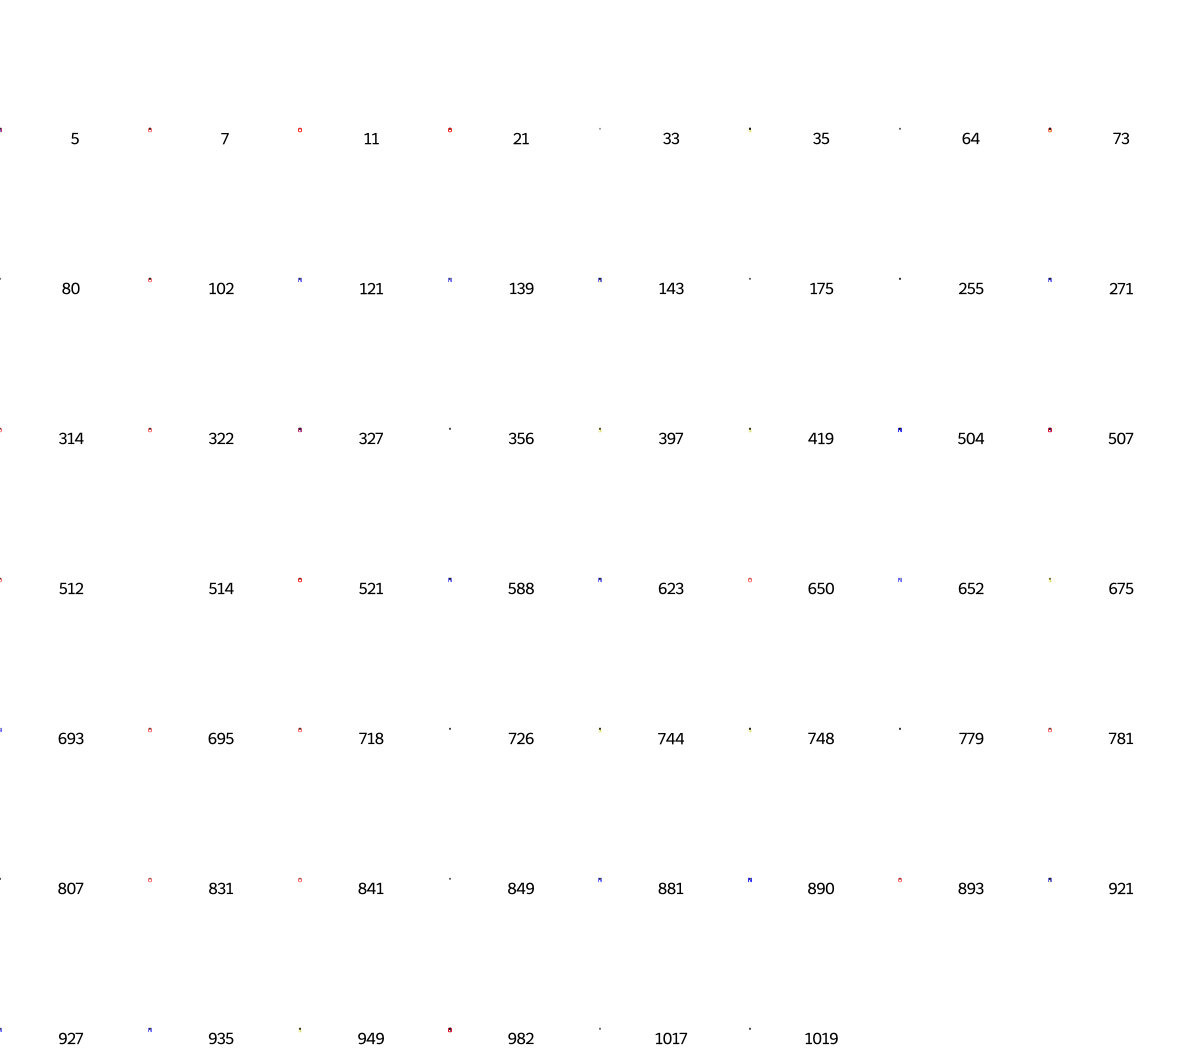

In [8376]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [8377]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[1,
 5,
 10,
 19,
 33,
 38,
 47,
 80,
 90,
 94,
 101,
 115,
 121,
 126,
 132,
 133,
 166,
 186,
 198,
 208,
 219,
 227,
 250,
 253,
 269,
 283,
 285,
 294,
 296,
 301,
 314,
 332,
 335,
 349,
 356,
 370,
 430,
 471,
 476,
 482,
 492,
 540,
 552,
 589,
 596,
 638,
 650,
 656,
 665,
 669,
 675,
 685,
 694,
 725,
 743,
 749,
 761,
 798,
 807,
 823,
 826,
 844,
 878,
 893,
 919,
 922,
 926,
 934,
 935,
 984,
 1019]

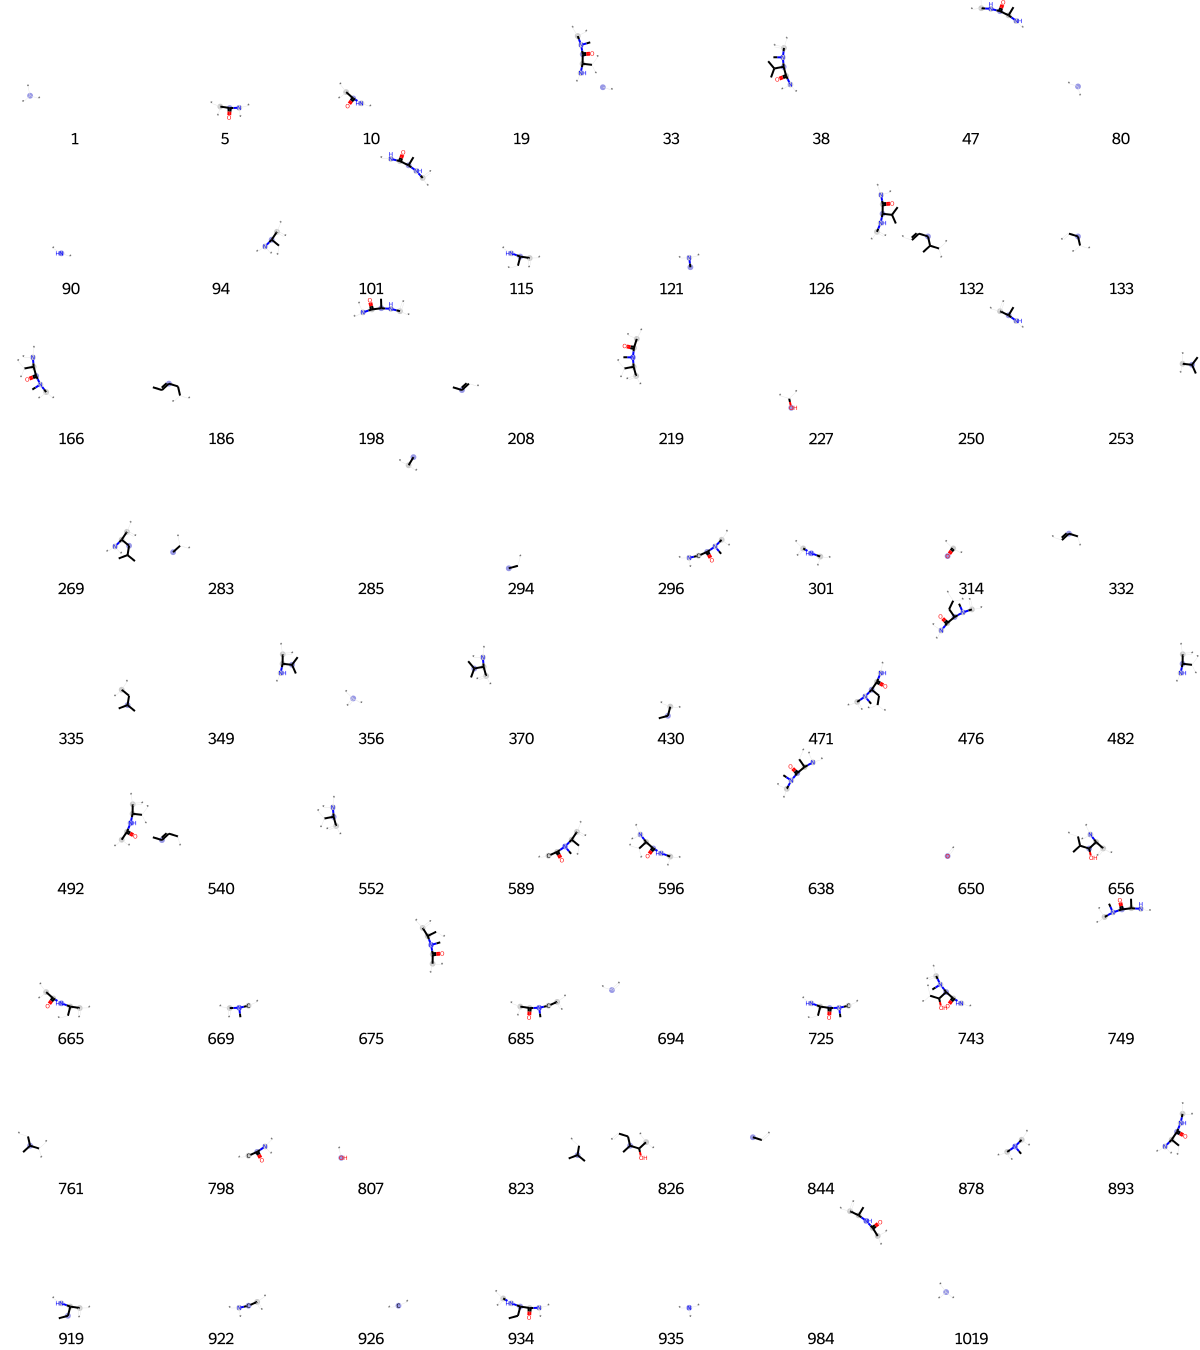

In [8378]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [8379]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[3,
 11,
 28,
 32,
 33,
 67,
 80,
 116,
 171,
 192,
 255,
 270,
 273,
 314,
 328,
 356,
 364,
 367,
 394,
 526,
 580,
 583,
 606,
 608,
 631,
 638,
 650,
 656,
 677,
 694,
 715,
 725,
 726,
 739,
 750,
 753,
 770,
 838,
 849,
 852,
 864,
 918,
 926,
 935,
 939,
 950,
 1019]

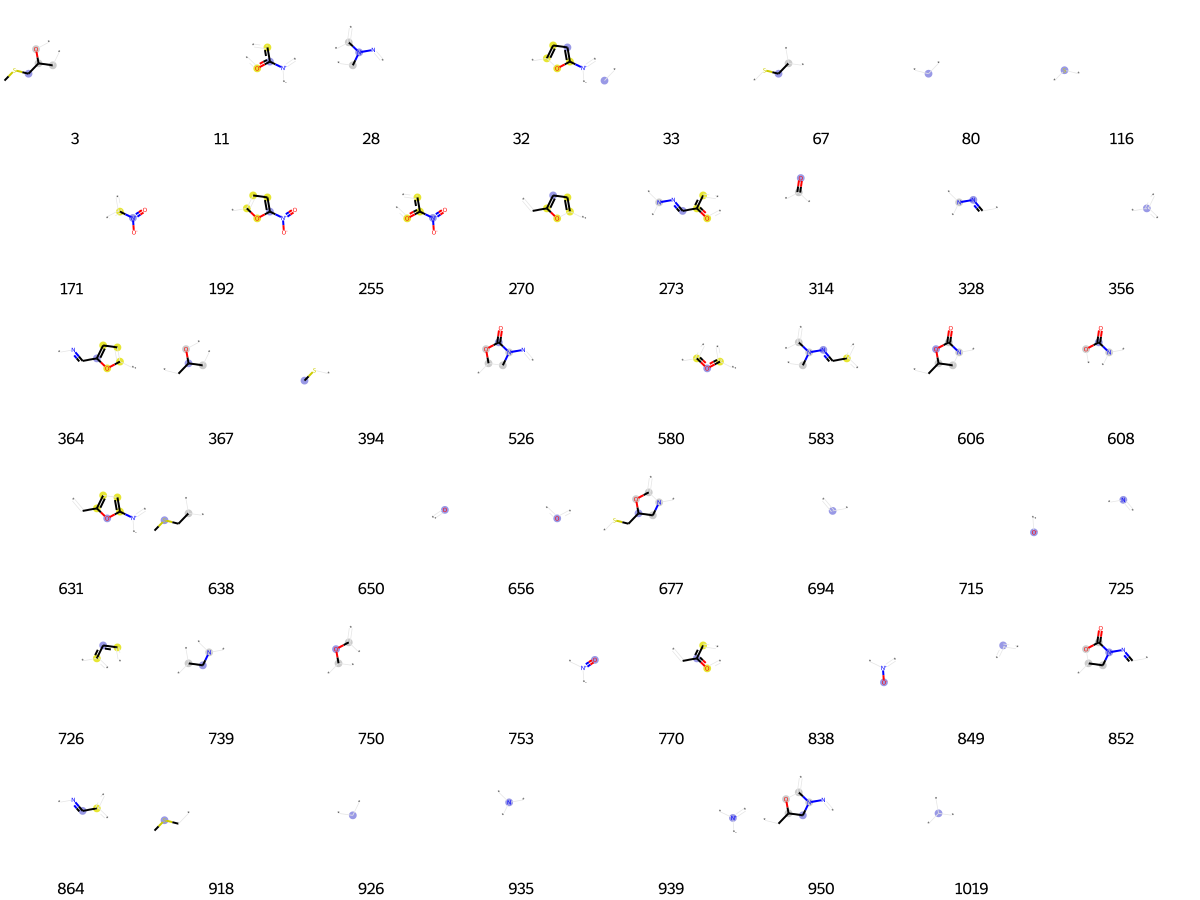

In [8380]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [8381]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[1,
 13,
 21,
 33,
 77,
 80,
 219,
 272,
 310,
 314,
 316,
 322,
 341,
 349,
 356,
 378,
 439,
 494,
 512,
 514,
 579,
 630,
 667,
 673,
 695,
 718,
 726,
 730,
 737,
 742,
 758,
 781,
 829,
 831,
 841,
 842,
 843,
 849,
 887,
 898,
 932,
 935,
 978]

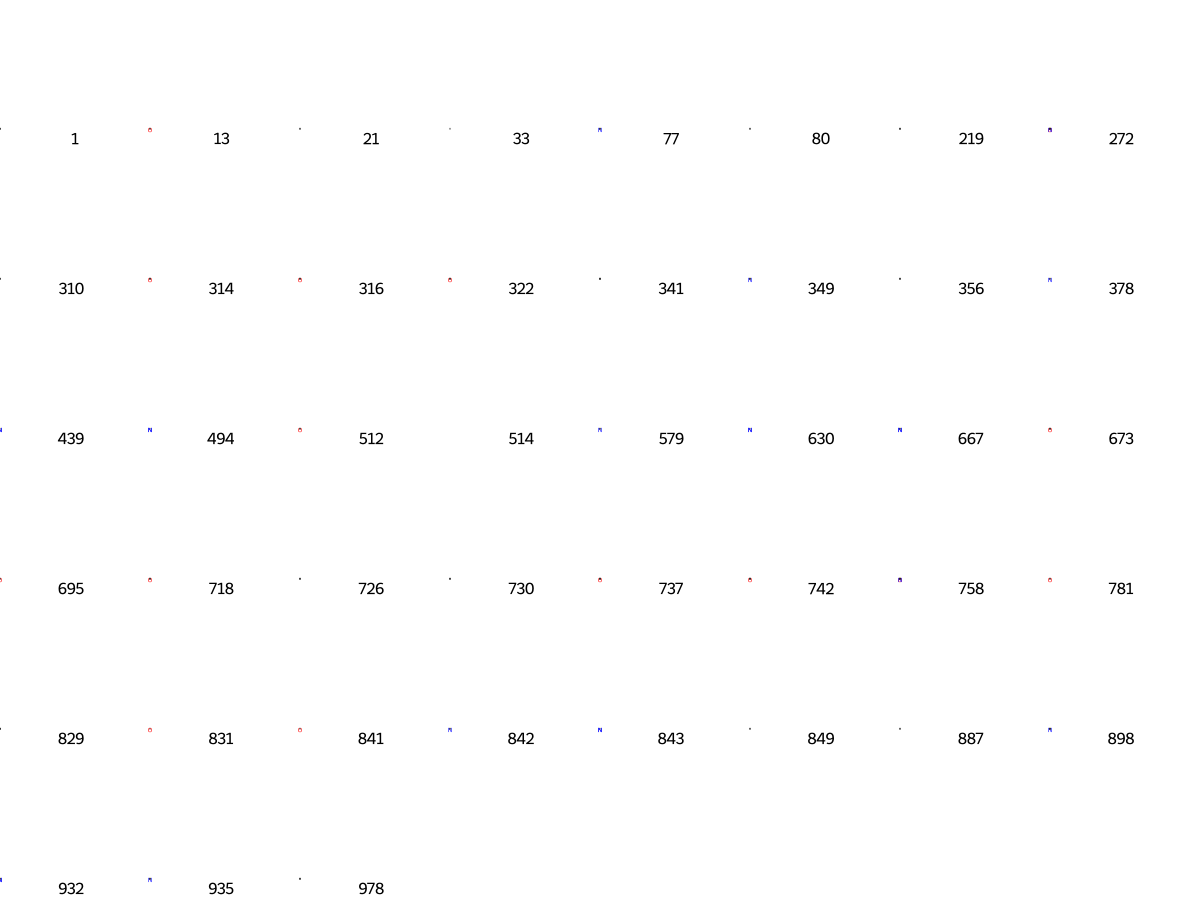

In [8382]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [8383]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[1,
 9,
 33,
 64,
 162,
 175,
 283,
 287,
 356,
 361,
 389,
 419,
 433,
 553,
 623,
 650,
 675,
 685,
 726,
 747,
 751,
 801,
 807,
 820,
 849,
 893,
 900,
 921,
 933,
 961]

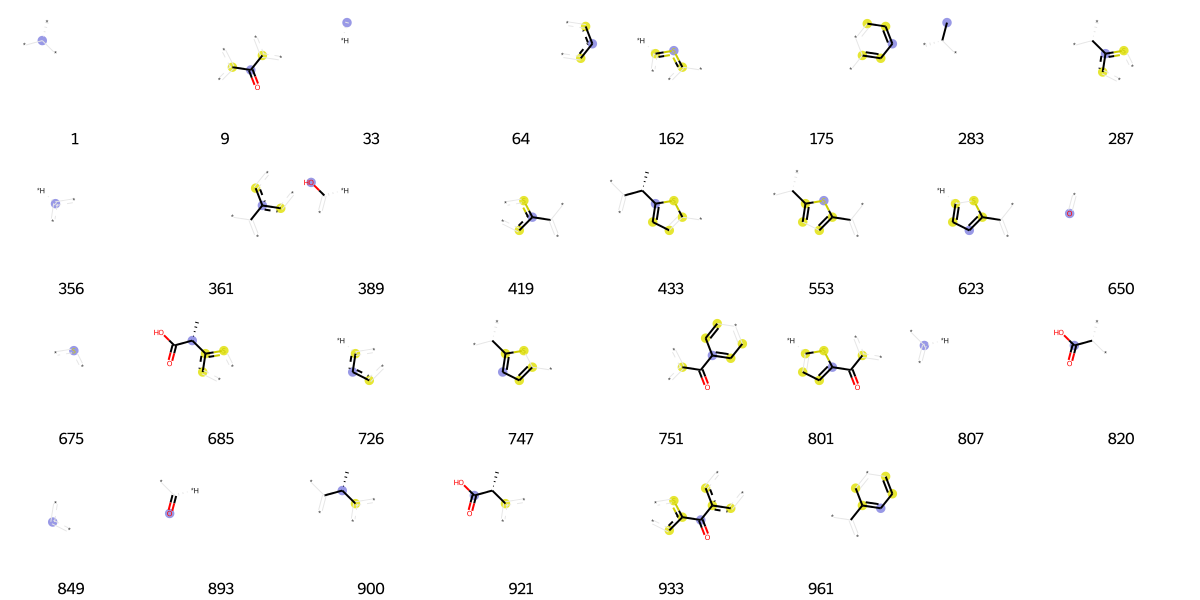

In [8384]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [8385]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 4,
 33,
 64,
 80,
 116,
 118,
 128,
 169,
 175,
 227,
 283,
 329,
 356,
 377,
 386,
 394,
 428,
 430,
 550,
 606,
 658,
 682,
 695,
 699,
 726,
 782,
 807,
 849,
 946,
 958,
 1006,
 1014]

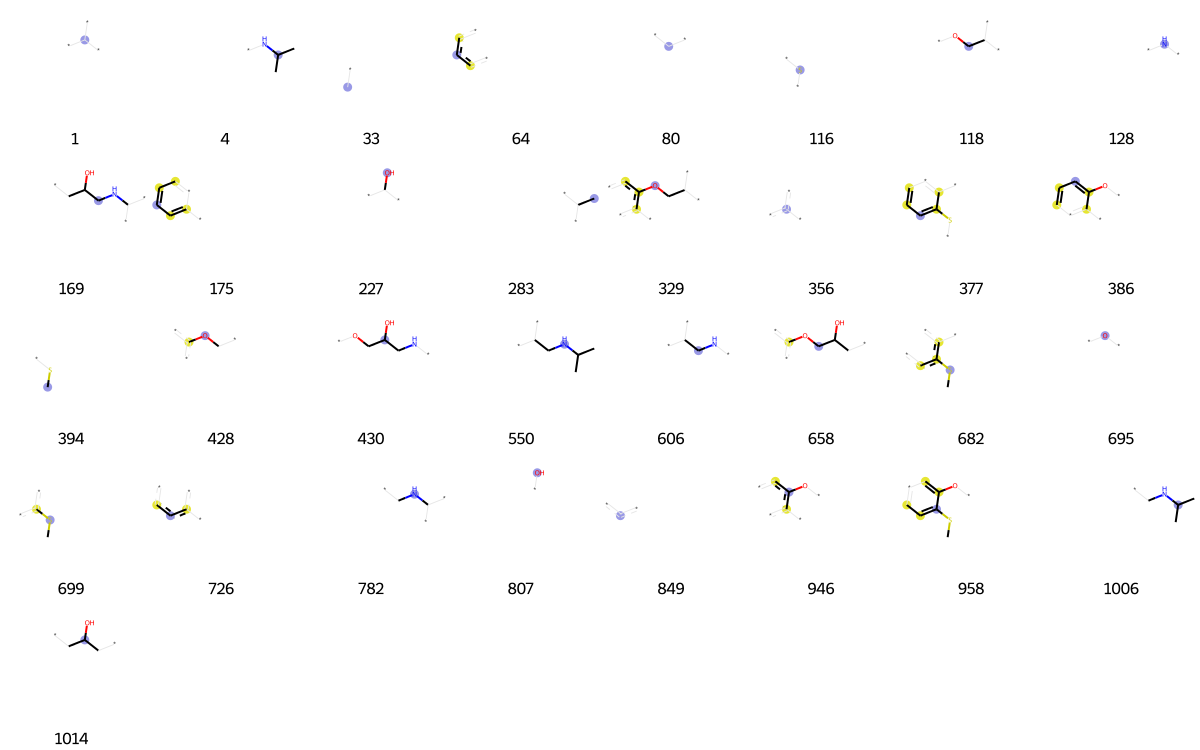

In [8386]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [8387]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[1,
 5,
 10,
 13,
 19,
 33,
 80,
 90,
 102,
 120,
 128,
 132,
 136,
 182,
 220,
 225,
 227,
 233,
 260,
 268,
 282,
 283,
 285,
 288,
 289,
 294,
 298,
 301,
 314,
 322,
 328,
 341,
 356,
 361,
 387,
 420,
 428,
 463,
 482,
 486,
 492,
 505,
 519,
 521,
 578,
 590,
 591,
 596,
 612,
 621,
 641,
 650,
 673,
 684,
 687,
 695,
 718,
 726,
 739,
 745,
 754,
 770,
 794,
 804,
 807,
 820,
 827,
 829,
 835,
 849,
 853,
 886,
 887,
 893,
 896,
 926,
 935,
 936,
 940,
 956,
 976,
 979,
 981,
 997,
 1019,
 1022]

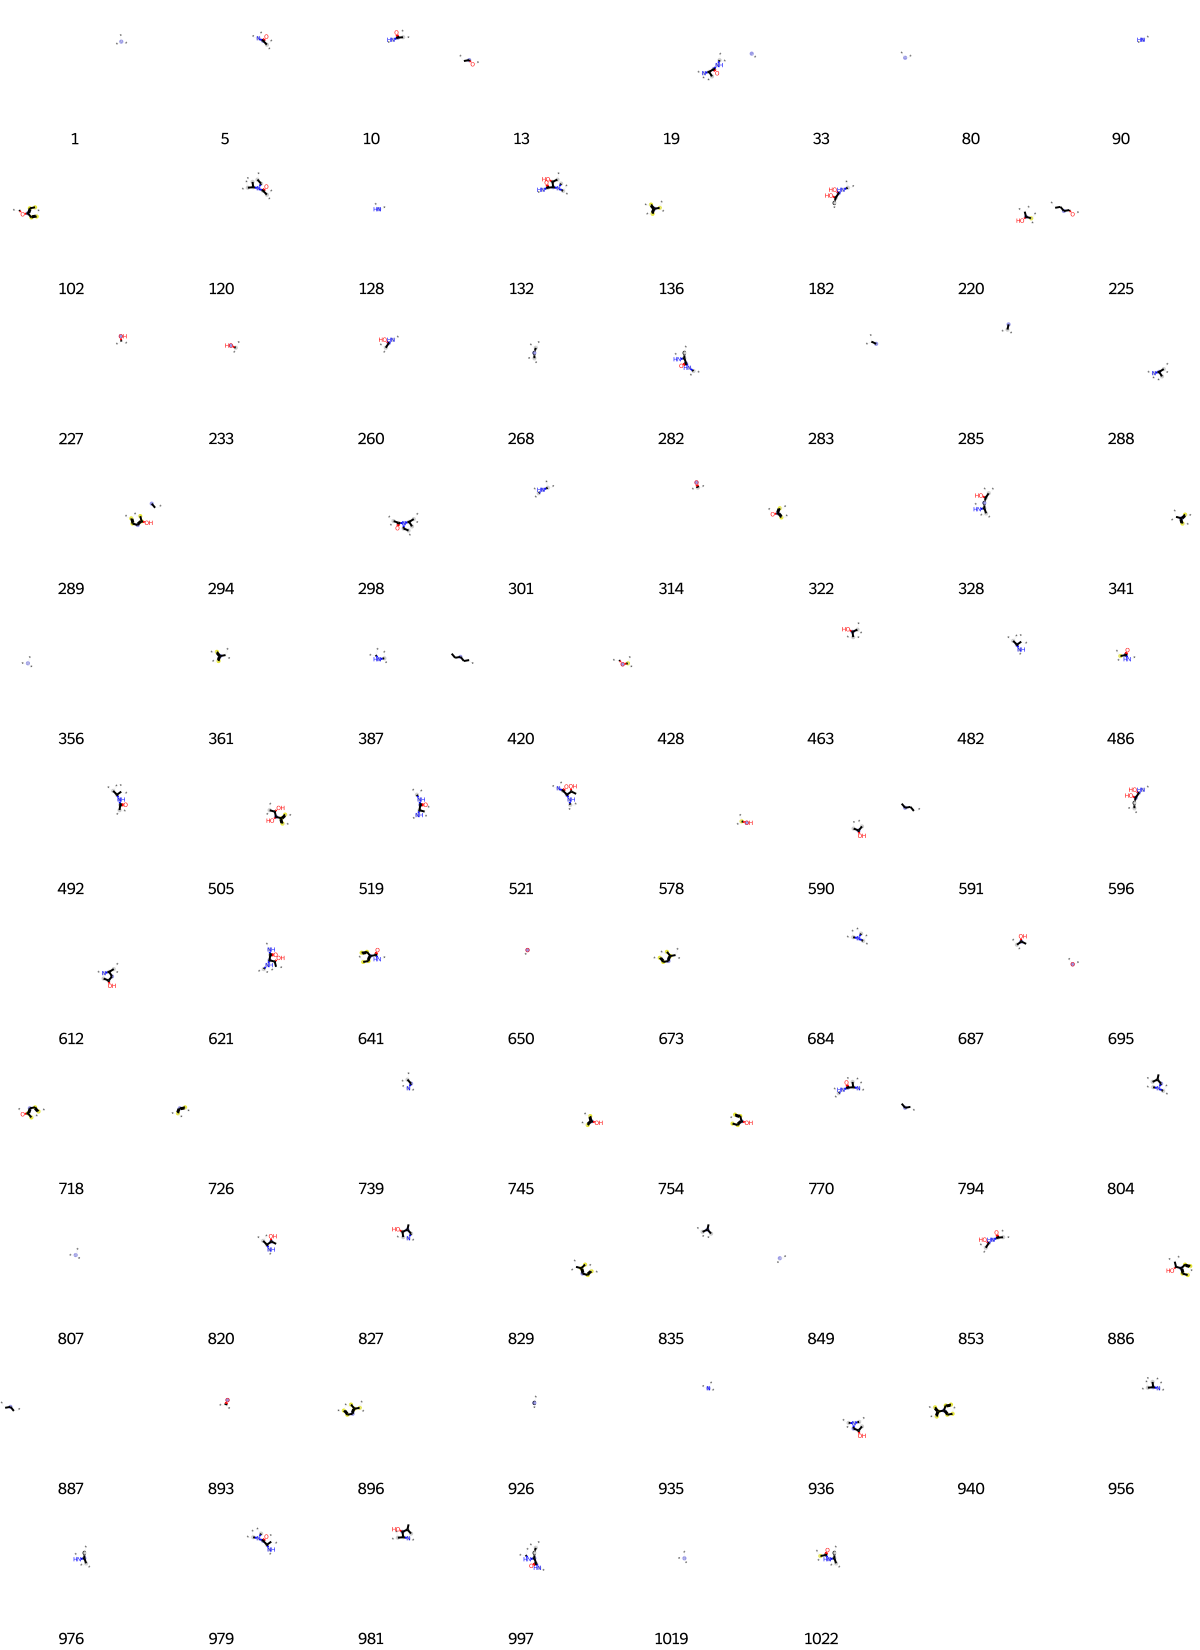

In [8388]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [8389]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[1,
 33,
 80,
 89,
 114,
 128,
 147,
 227,
 269,
 275,
 338,
 341,
 356,
 366,
 392,
 433,
 447,
 514,
 554,
 561,
 603,
 606,
 632,
 649,
 659,
 807,
 843,
 849,
 875,
 942,
 951]

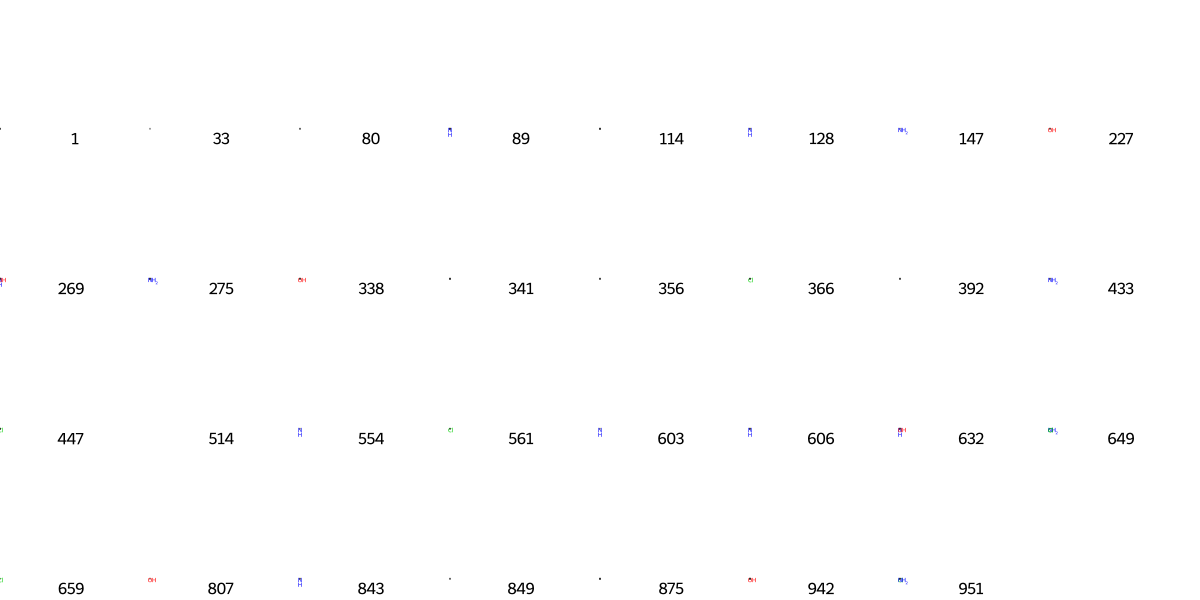

In [8390]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [8391]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[15,
 33,
 36,
 64,
 74,
 80,
 90,
 119,
 130,
 138,
 150,
 175,
 201,
 212,
 231,
 264,
 270,
 275,
 288,
 311,
 333,
 342,
 356,
 361,
 389,
 451,
 456,
 470,
 474,
 514,
 549,
 556,
 578,
 583,
 632,
 649,
 656,
 682,
 721,
 726,
 736,
 737,
 750,
 759,
 784,
 790,
 791,
 807,
 808,
 849,
 908,
 926,
 935,
 940,
 948,
 956,
 978,
 991,
 998,
 1017,
 1019,
 1021,
 1022]

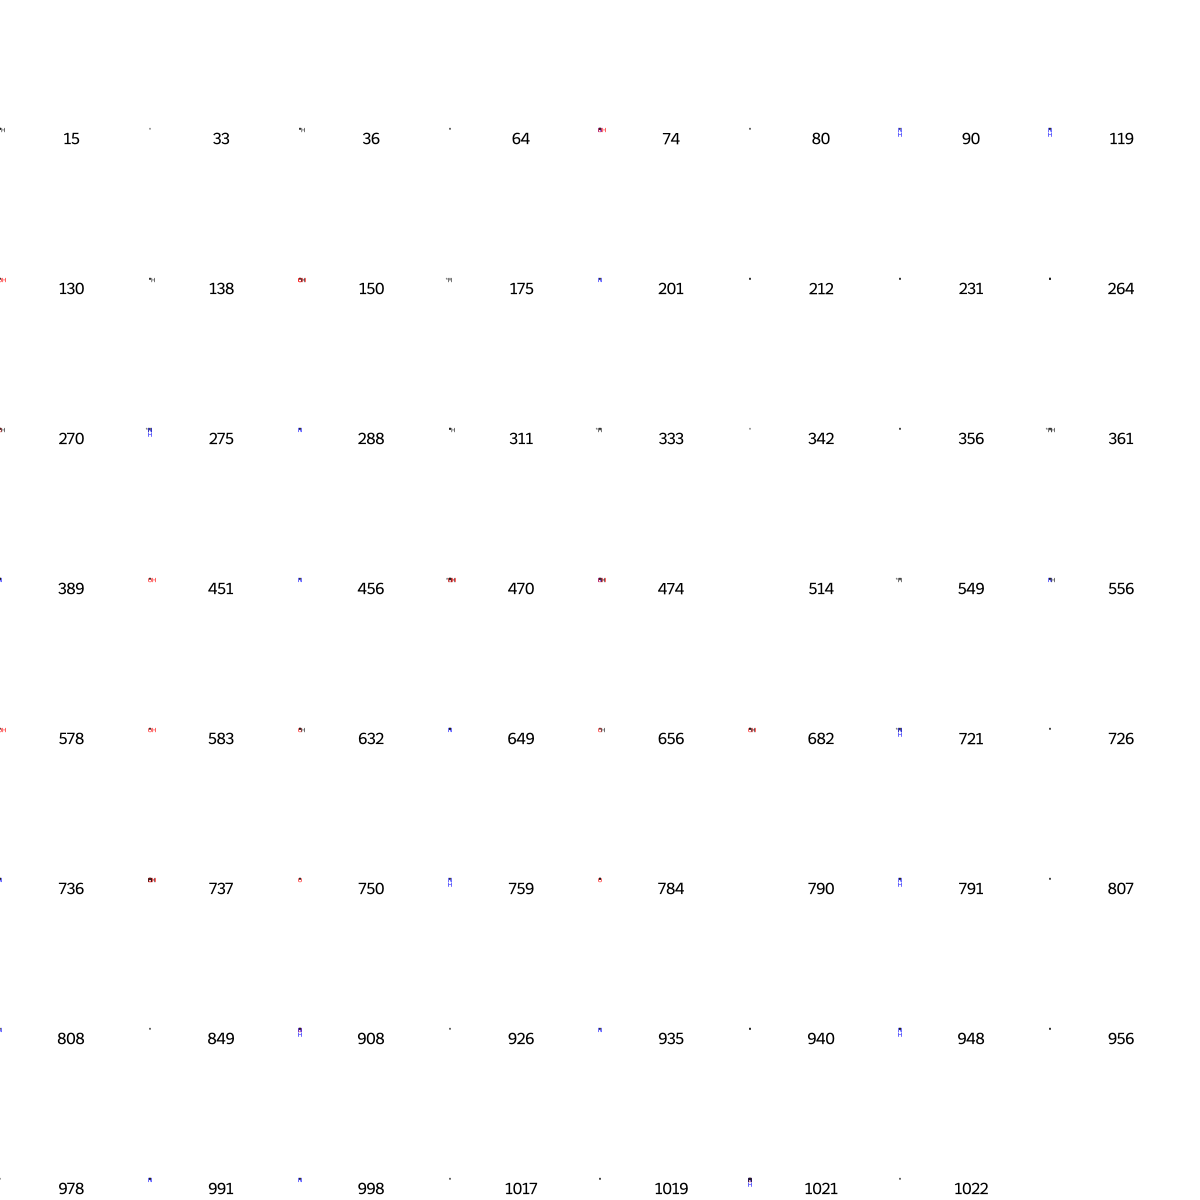

In [8392]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [8393]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[1,
 3,
 15,
 19,
 33,
 41,
 64,
 73,
 80,
 94,
 114,
 117,
 128,
 136,
 140,
 200,
 221,
 249,
 289,
 310,
 322,
 325,
 333,
 356,
 357,
 360,
 363,
 378,
 392,
 428,
 448,
 488,
 512,
 549,
 605,
 613,
 620,
 629,
 636,
 640,
 643,
 650,
 672,
 674,
 695,
 705,
 725,
 726,
 730,
 735,
 742,
 749,
 790,
 792,
 798,
 807,
 841,
 842,
 849,
 875,
 893,
 943,
 946,
 975]

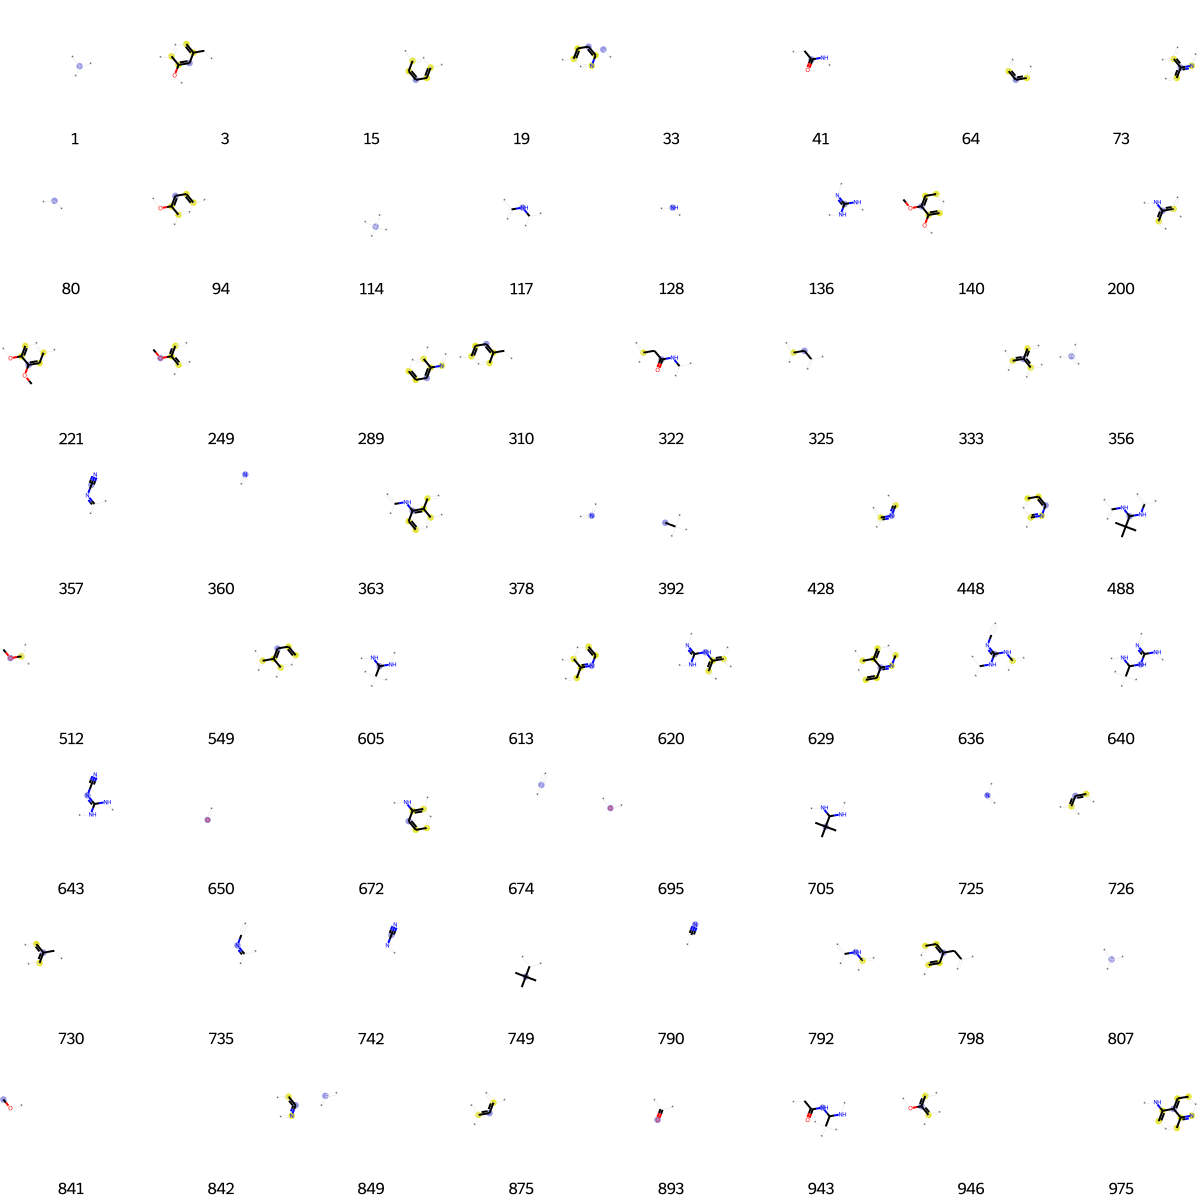

In [8394]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [8395]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[5,
 100,
 104,
 114,
 116,
 164,
 222,
 314,
 337,
 356,
 359,
 403,
 404,
 414,
 455,
 522,
 598,
 650,
 659,
 803,
 849,
 926,
 935,
 952,
 1019]

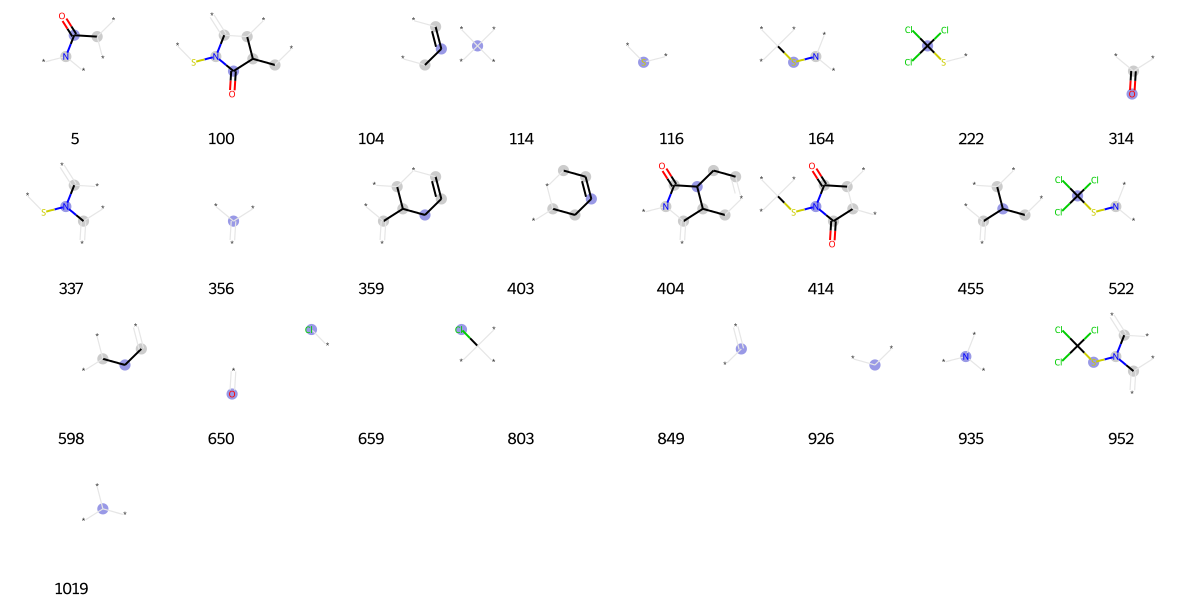

In [8396]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [8397]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[19,
 42,
 64,
 80,
 83,
 90,
 114,
 147,
 175,
 207,
 227,
 252,
 262,
 266,
 301,
 350,
 356,
 363,
 389,
 392,
 419,
 429,
 432,
 452,
 458,
 469,
 583,
 607,
 625,
 650,
 652,
 691,
 717,
 726,
 730,
 809,
 833,
 840,
 849,
 861,
 865,
 875,
 892,
 904,
 924,
 958,
 1019]

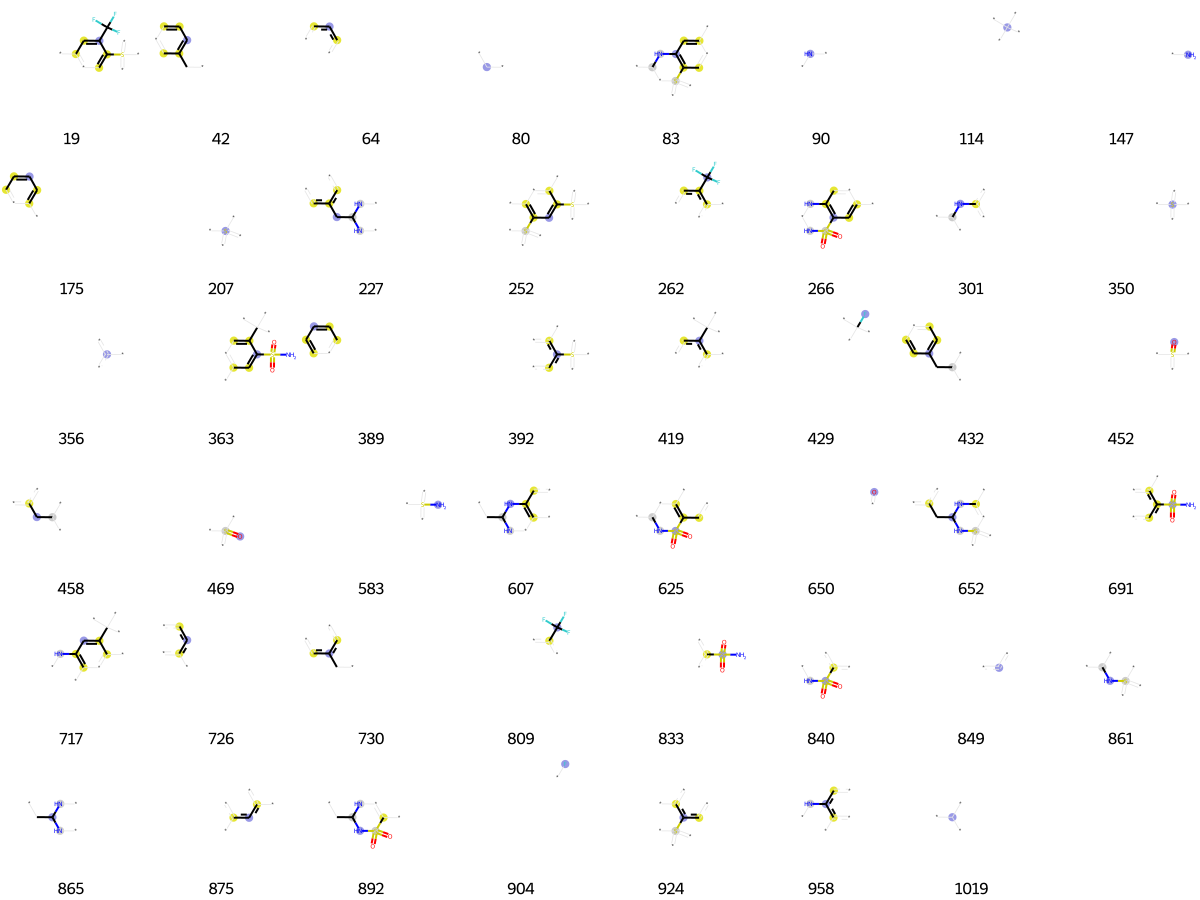

In [8398]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [8399]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[1,
 5,
 33,
 41,
 116,
 201,
 202,
 208,
 227,
 243,
 263,
 283,
 285,
 294,
 314,
 334,
 353,
 356,
 378,
 430,
 438,
 457,
 460,
 463,
 470,
 511,
 544,
 550,
 579,
 614,
 650,
 652,
 671,
 676,
 684,
 686,
 687,
 703,
 705,
 715,
 739,
 807,
 815,
 841,
 849,
 862,
 871,
 893,
 898,
 926,
 932,
 935,
 960,
 1019]

In [8400]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[18,
 33,
 36,
 59,
 61,
 80,
 84,
 130,
 141,
 170,
 182,
 189,
 192,
 233,
 250,
 251,
 268,
 285,
 301,
 314,
 356,
 404,
 412,
 424,
 460,
 486,
 504,
 519,
 532,
 547,
 563,
 585,
 600,
 620,
 650,
 679,
 692,
 695,
 714,
 715,
 748,
 750,
 760,
 767,
 787,
 804,
 807,
 843,
 849,
 885,
 886,
 893,
 904,
 926,
 951,
 967,
 973,
 980,
 997,
 1002,
 1019,
 1020]

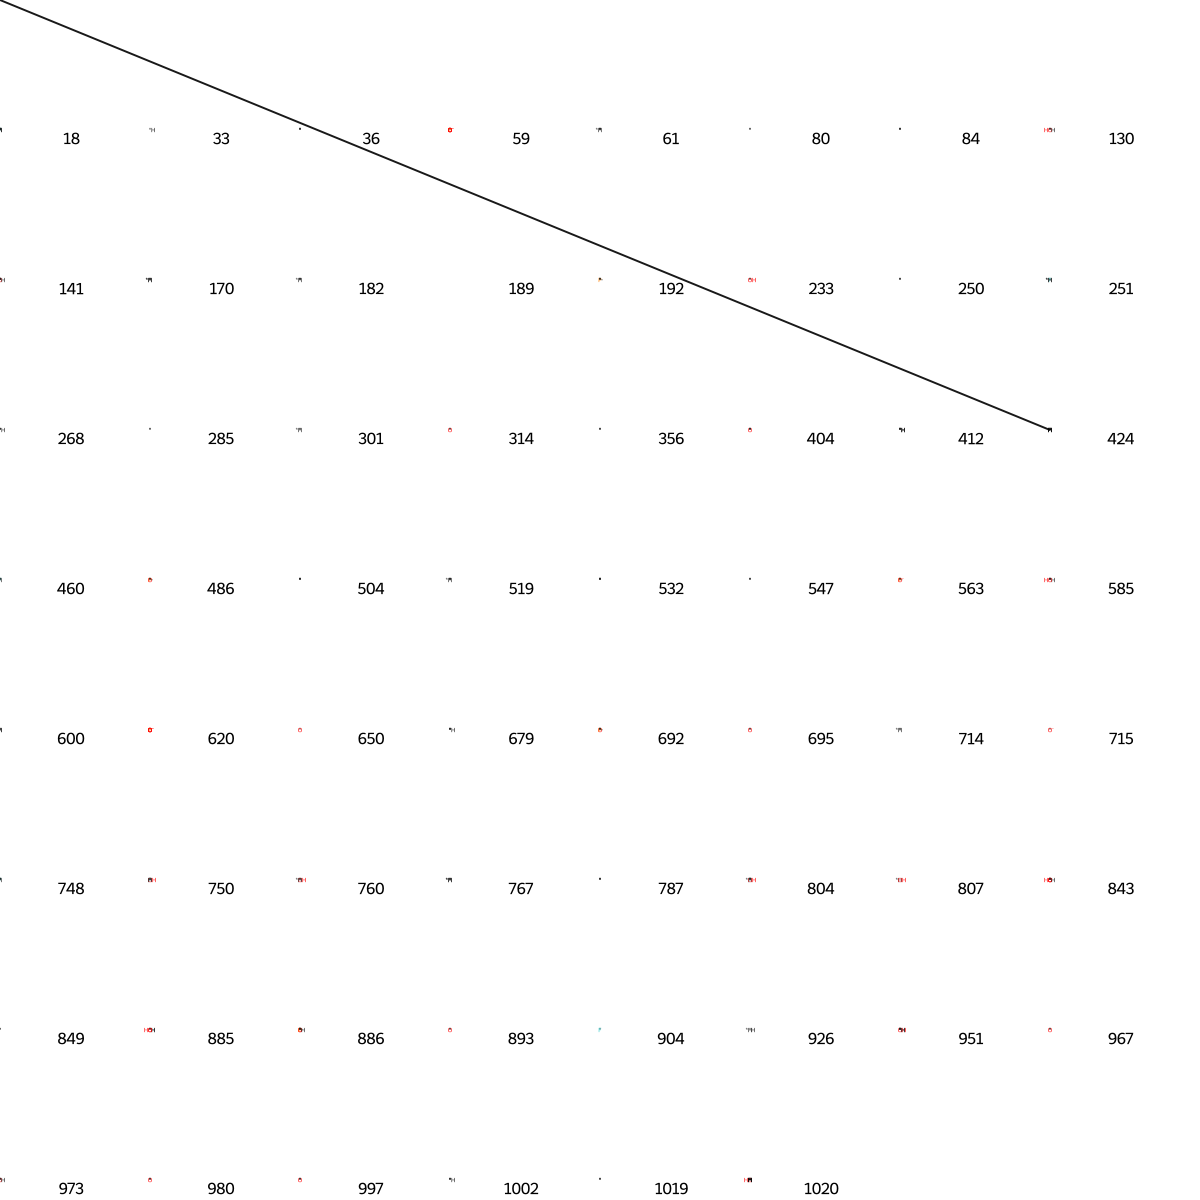

In [8401]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [8402]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[4,
 33,
 39,
 128,
 147,
 176,
 206,
 233,
 275,
 276,
 285,
 301,
 319,
 350,
 356,
 361,
 366,
 392,
 452,
 460,
 486,
 526,
 545,
 561,
 583,
 650,
 659,
 666,
 673,
 691,
 726,
 734,
 742,
 807,
 833,
 849,
 855,
 875,
 893,
 926,
 935,
 1019]

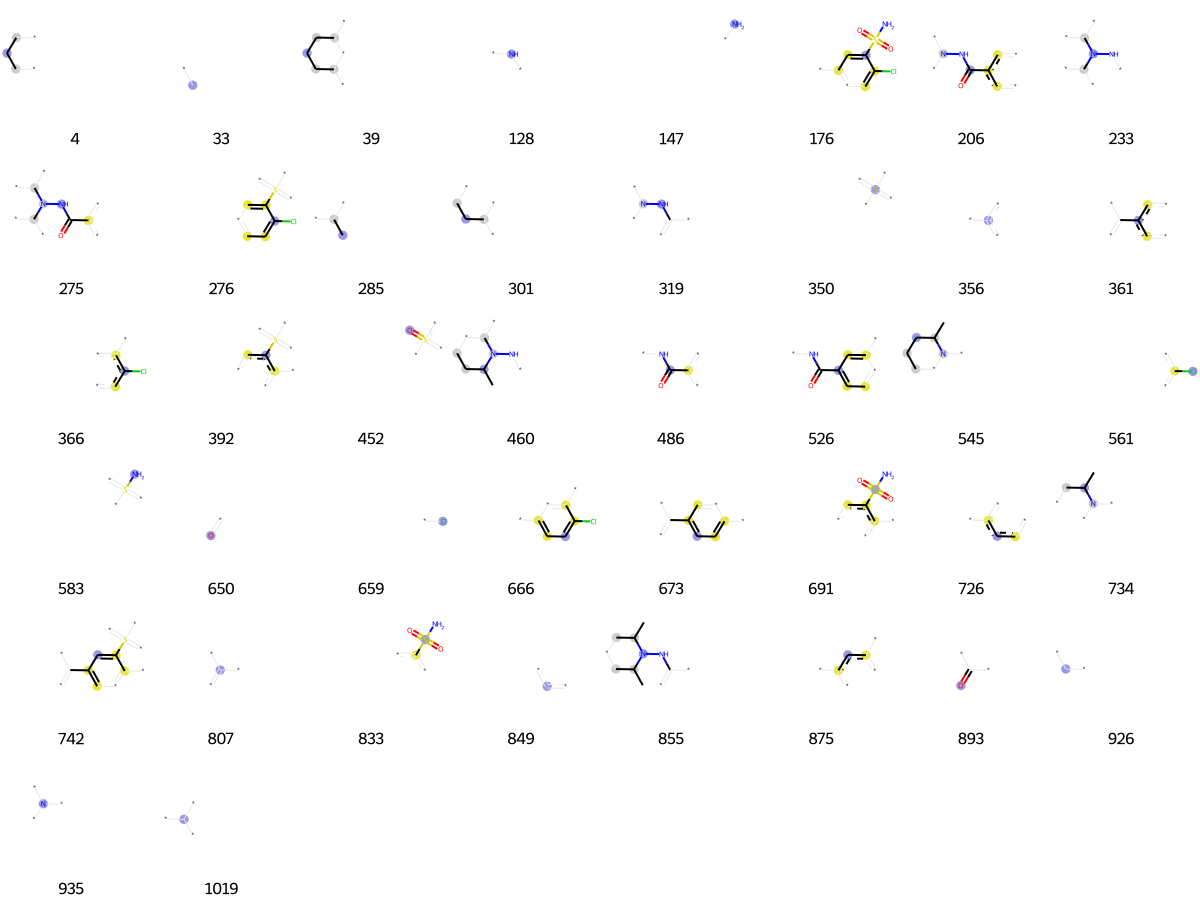

In [8403]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [8404]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[17,
 18,
 33,
 36,
 46,
 59,
 61,
 80,
 84,
 85,
 96,
 118,
 138,
 162,
 182,
 233,
 242,
 250,
 251,
 262,
 268,
 281,
 301,
 314,
 356,
 412,
 418,
 424,
 434,
 479,
 504,
 519,
 650,
 656,
 659,
 667,
 676,
 679,
 703,
 706,
 714,
 734,
 748,
 760,
 786,
 804,
 807,
 841,
 849,
 893,
 900,
 904,
 905,
 910,
 926,
 951,
 960,
 973,
 1019]

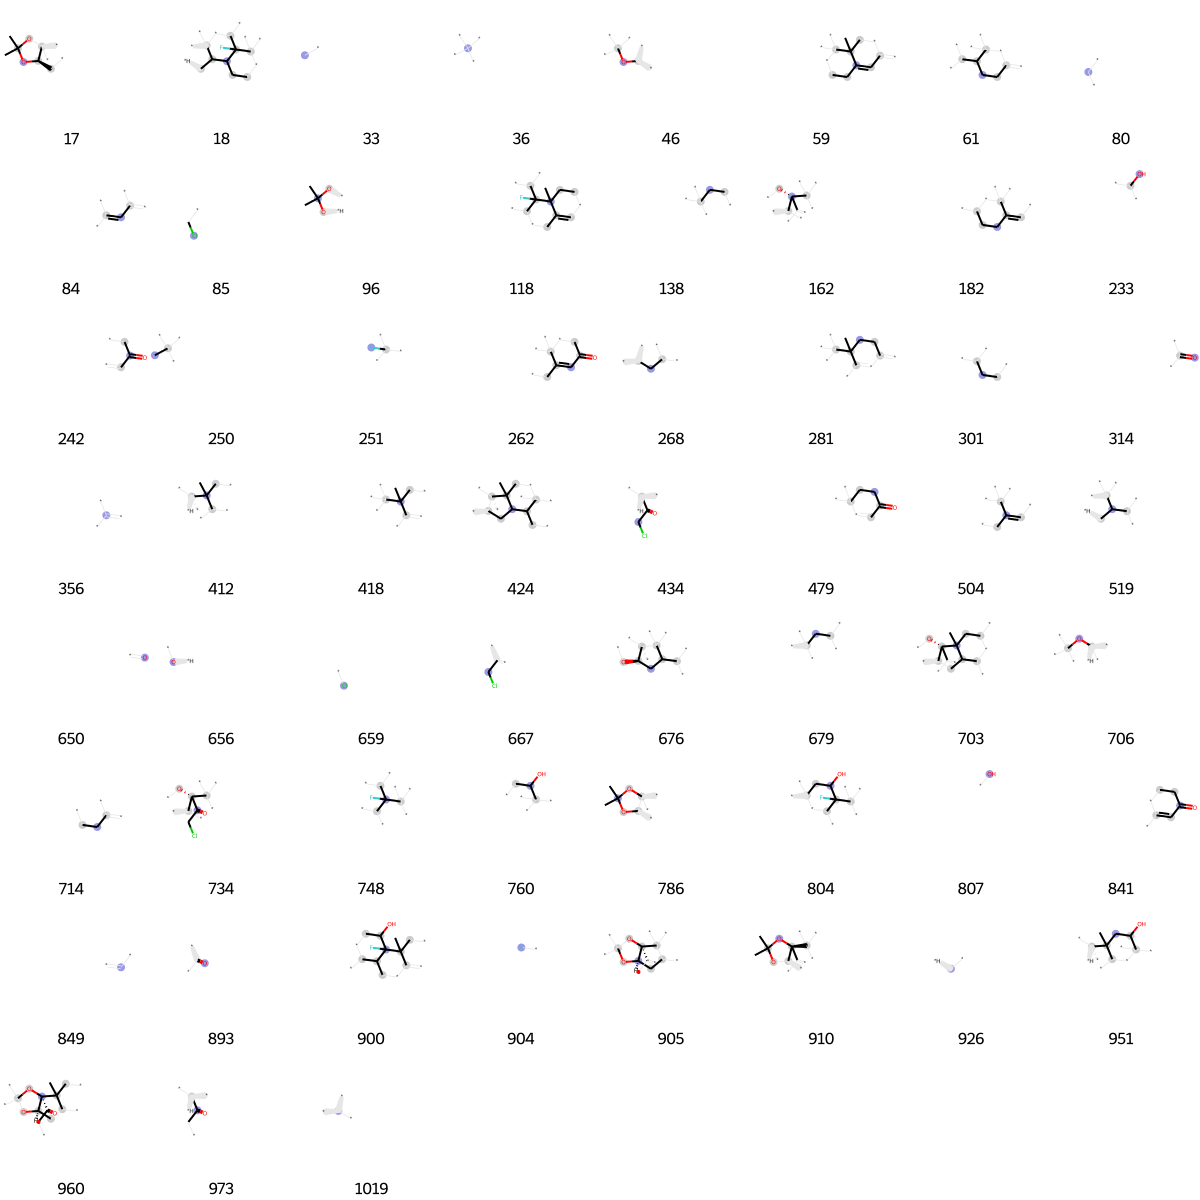

In [8405]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [8406]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[1,
 33,
 80,
 117,
 169,
 227,
 266,
 319,
 389,
 414,
 548,
 628,
 650,
 713,
 807,
 838,
 893,
 980,
 1014]

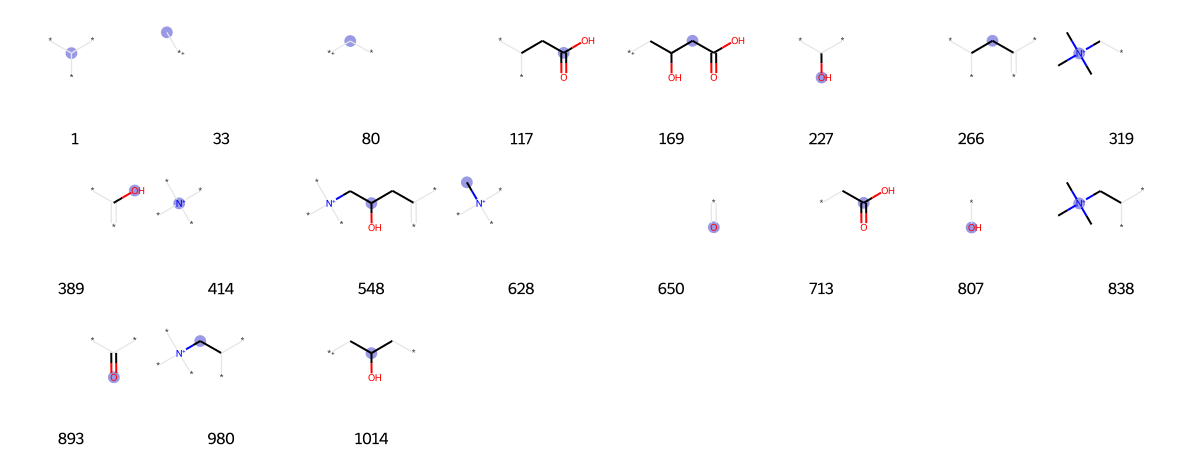

In [8407]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [8408]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[23,
 64,
 80,
 110,
 128,
 143,
 147,
 176,
 200,
 209,
 255,
 283,
 288,
 350,
 356,
 366,
 389,
 392,
 442,
 452,
 456,
 474,
 494,
 514,
 561,
 568,
 583,
 650,
 656,
 659,
 691,
 726,
 787,
 807,
 833,
 849,
 875,
 893,
 902,
 910,
 954,
 967]

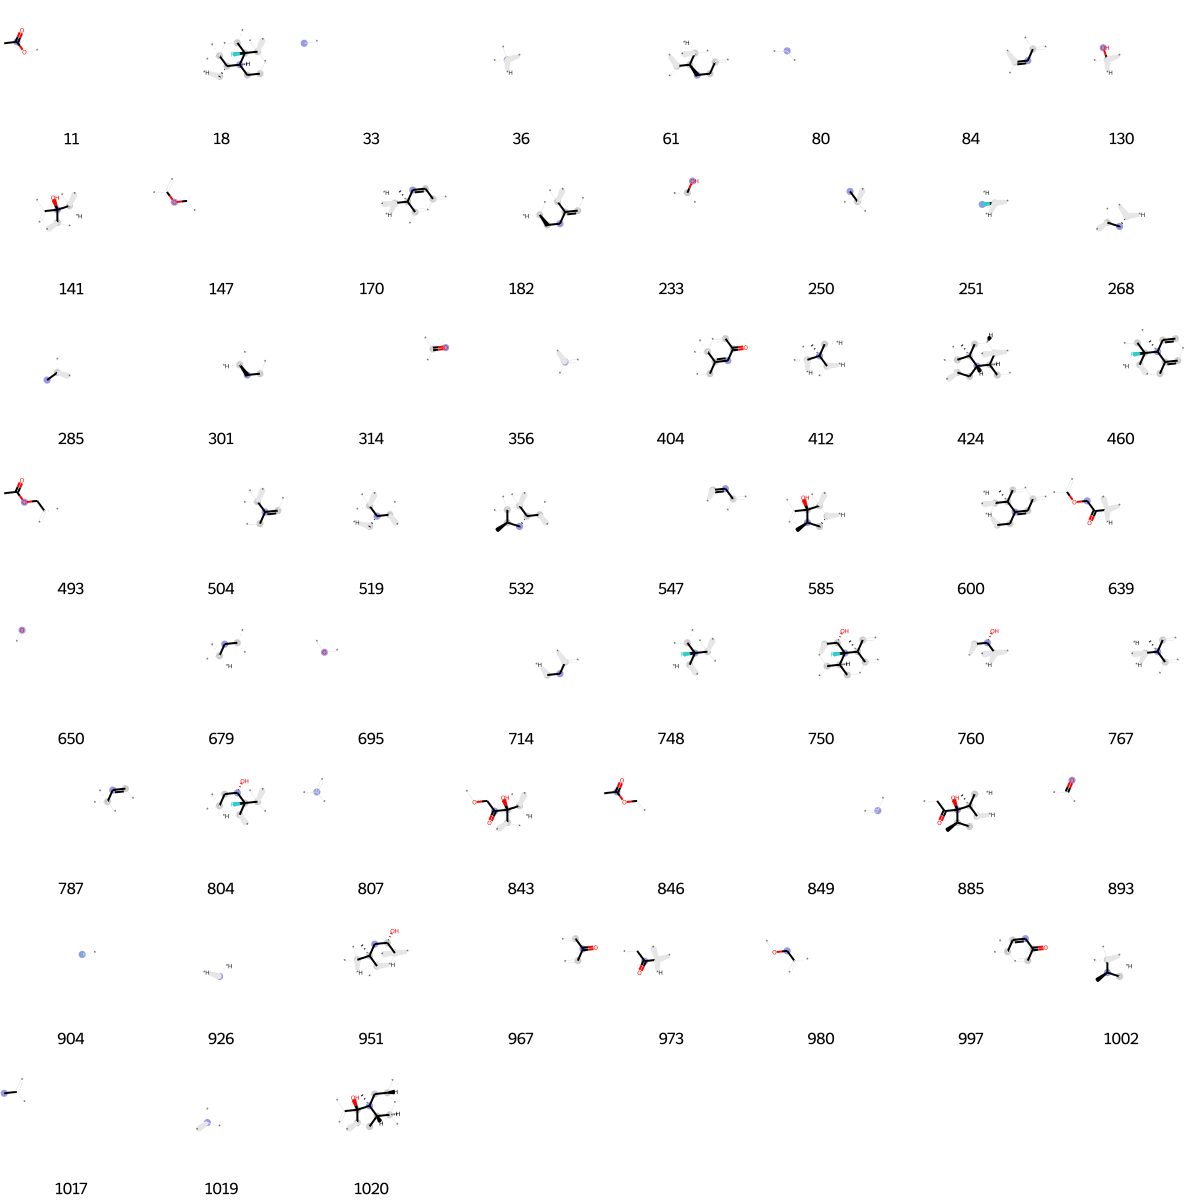

In [8409]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [8410]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[33,
 63,
 80,
 90,
 233,
 235,
 250,
 280,
 310,
 314,
 319,
 335,
 356,
 386,
 418,
 591,
 646,
 650,
 659,
 675,
 698,
 699,
 726,
 730,
 741,
 771,
 781,
 797,
 799,
 801,
 802,
 849,
 896,
 904,
 935]

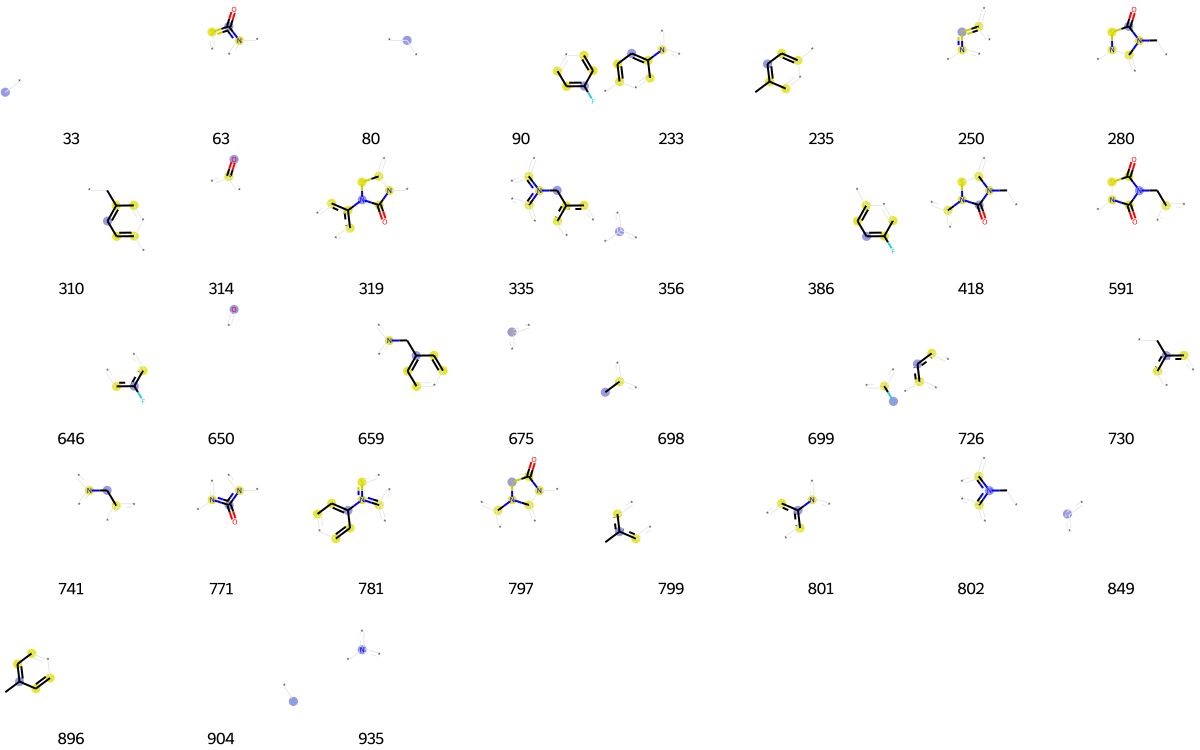

In [8411]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [8412]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[29,
 33,
 36,
 54,
 64,
 80,
 103,
 112,
 136,
 164,
 233,
 250,
 252,
 258,
 301,
 314,
 319,
 324,
 350,
 356,
 419,
 425,
 428,
 452,
 482,
 496,
 643,
 647,
 650,
 656,
 692,
 695,
 715,
 726,
 769,
 849,
 859,
 879,
 896,
 926,
 1019]

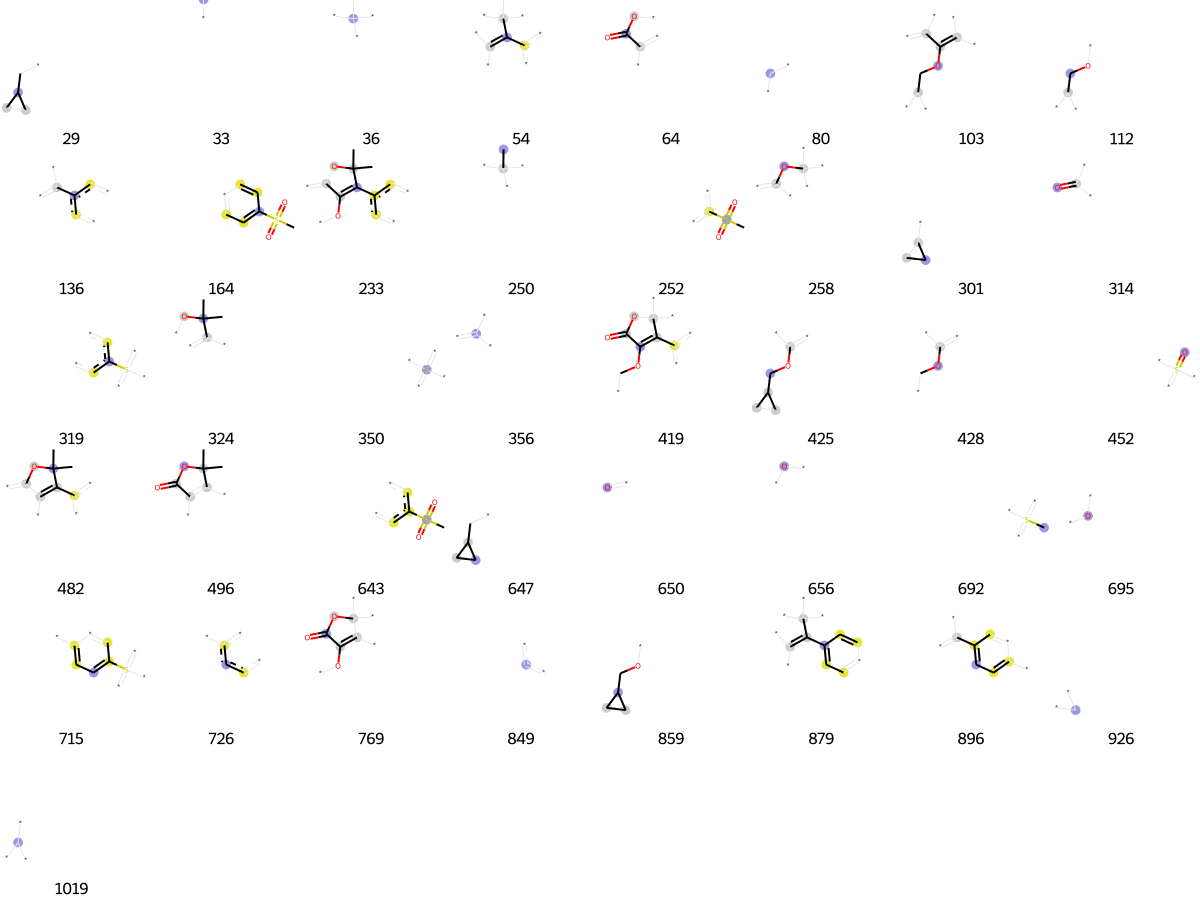

In [8413]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [8414]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[1,
 4,
 8,
 25,
 33,
 36,
 37,
 64,
 138,
 180,
 216,
 225,
 231,
 233,
 243,
 250,
 282,
 283,
 301,
 322,
 334,
 356,
 439,
 453,
 470,
 481,
 504,
 590,
 600,
 625,
 678,
 687,
 694,
 699,
 749,
 775,
 807,
 849,
 850,
 860,
 921,
 923,
 926,
 927,
 978,
 993,
 1019]

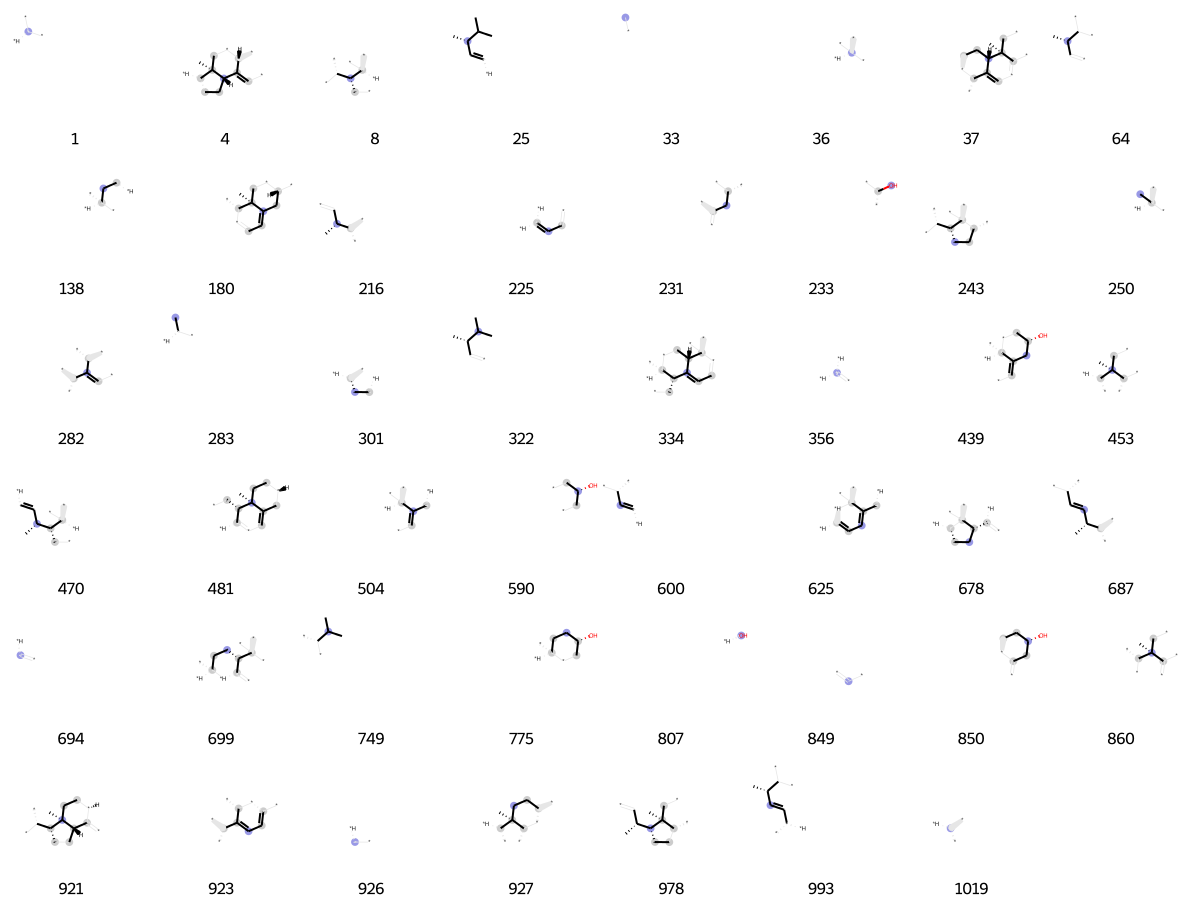

In [8415]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [8416]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[4,
 33,
 53,
 80,
 128,
 144,
 147,
 231,
 246,
 319,
 341,
 350,
 356,
 378,
 433,
 452,
 496,
 502,
 558,
 650,
 698,
 707,
 715,
 726,
 780,
 831,
 849,
 875,
 883,
 888]

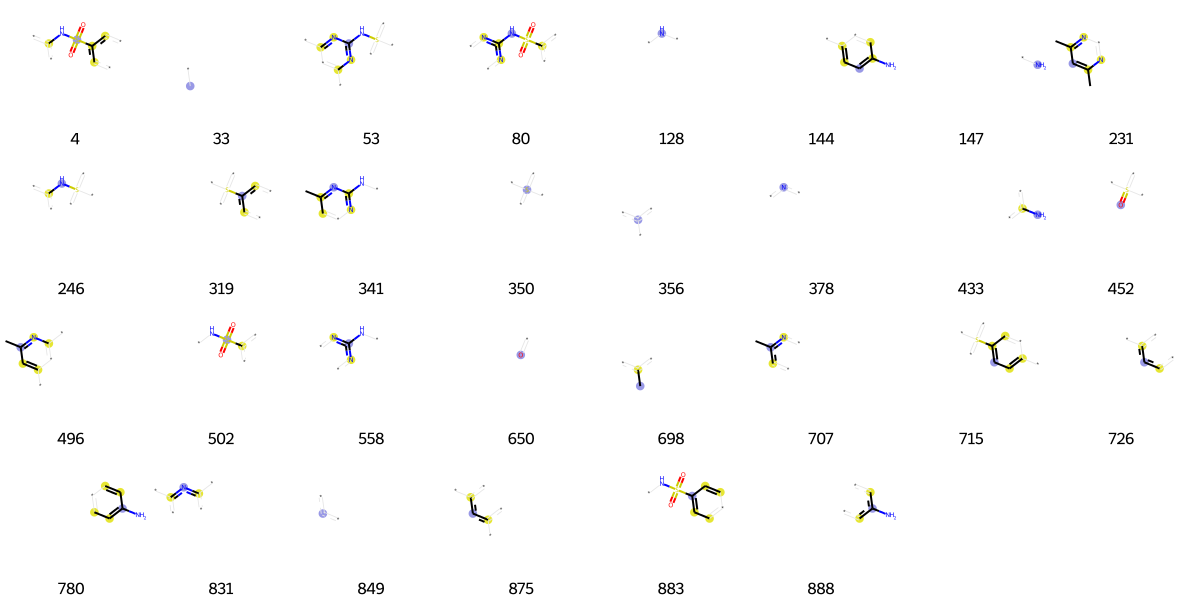

In [8417]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [8418]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[31,
 33,
 43,
 64,
 77,
 121,
 128,
 136,
 147,
 157,
 168,
 175,
 200,
 247,
 275,
 284,
 319,
 327,
 350,
 353,
 356,
 374,
 378,
 409,
 419,
 433,
 452,
 464,
 494,
 511,
 523,
 611,
 650,
 672,
 694,
 715,
 726,
 738,
 792,
 794,
 800,
 807,
 816,
 835,
 849,
 873,
 893,
 896,
 906,
 910,
 926,
 935,
 940,
 999,
 1009,
 1015]

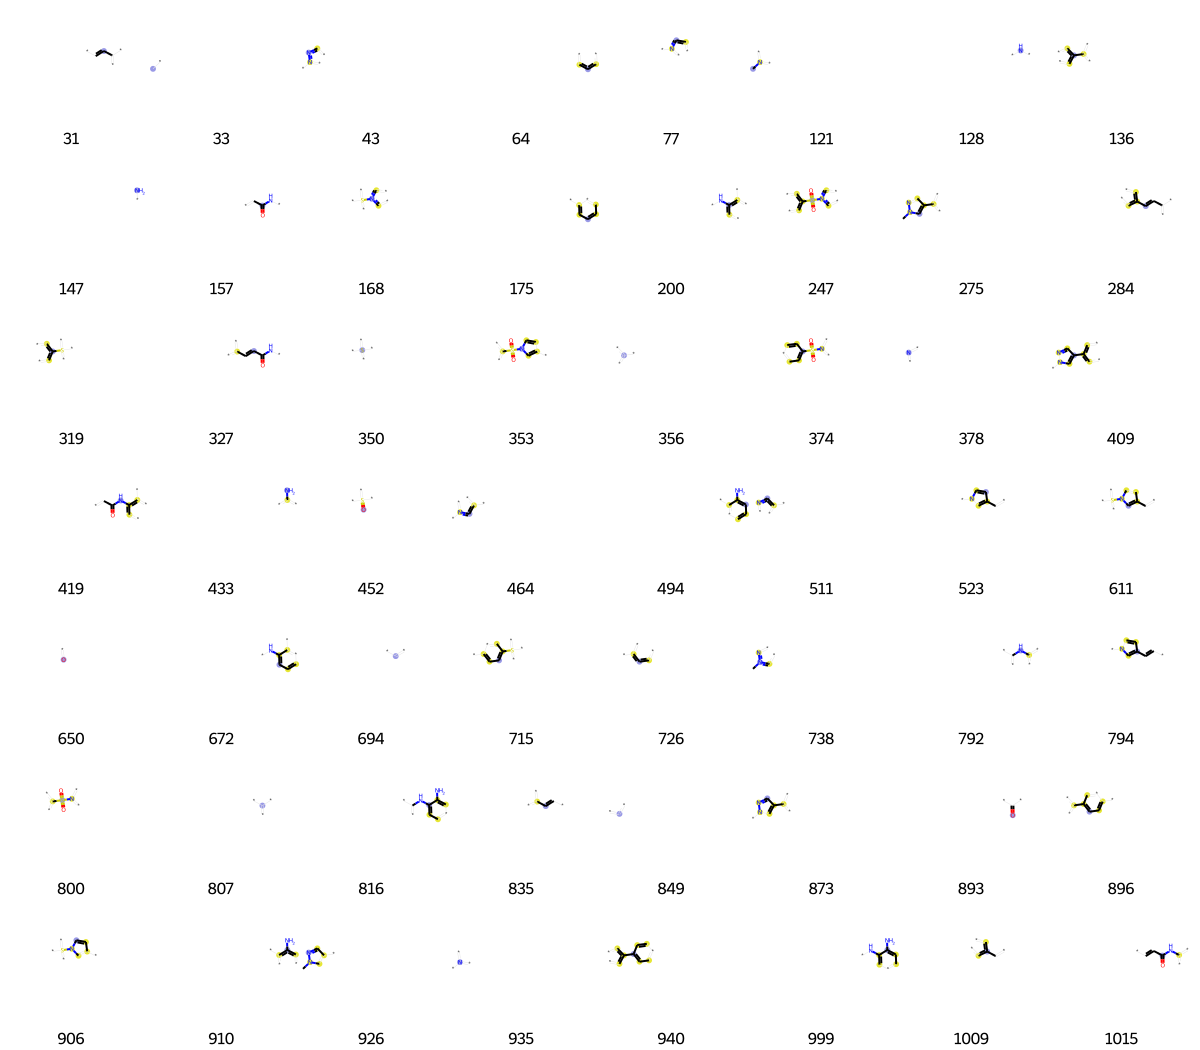

In [8419]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [8420]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[2,
 4,
 36,
 61,
 80,
 116,
 121,
 128,
 136,
 158,
 162,
 211,
 224,
 276,
 301,
 310,
 319,
 341,
 350,
 356,
 371,
 378,
 381,
 385,
 398,
 402,
 428,
 452,
 456,
 458,
 465,
 484,
 491,
 511,
 519,
 522,
 525,
 556,
 585,
 650,
 675,
 679,
 715,
 726,
 758,
 767,
 788,
 789,
 792,
 807,
 849,
 860,
 865,
 871,
 890,
 893,
 896,
 911,
 926,
 935,
 961,
 970,
 974,
 1004,
 1018,
 1019]

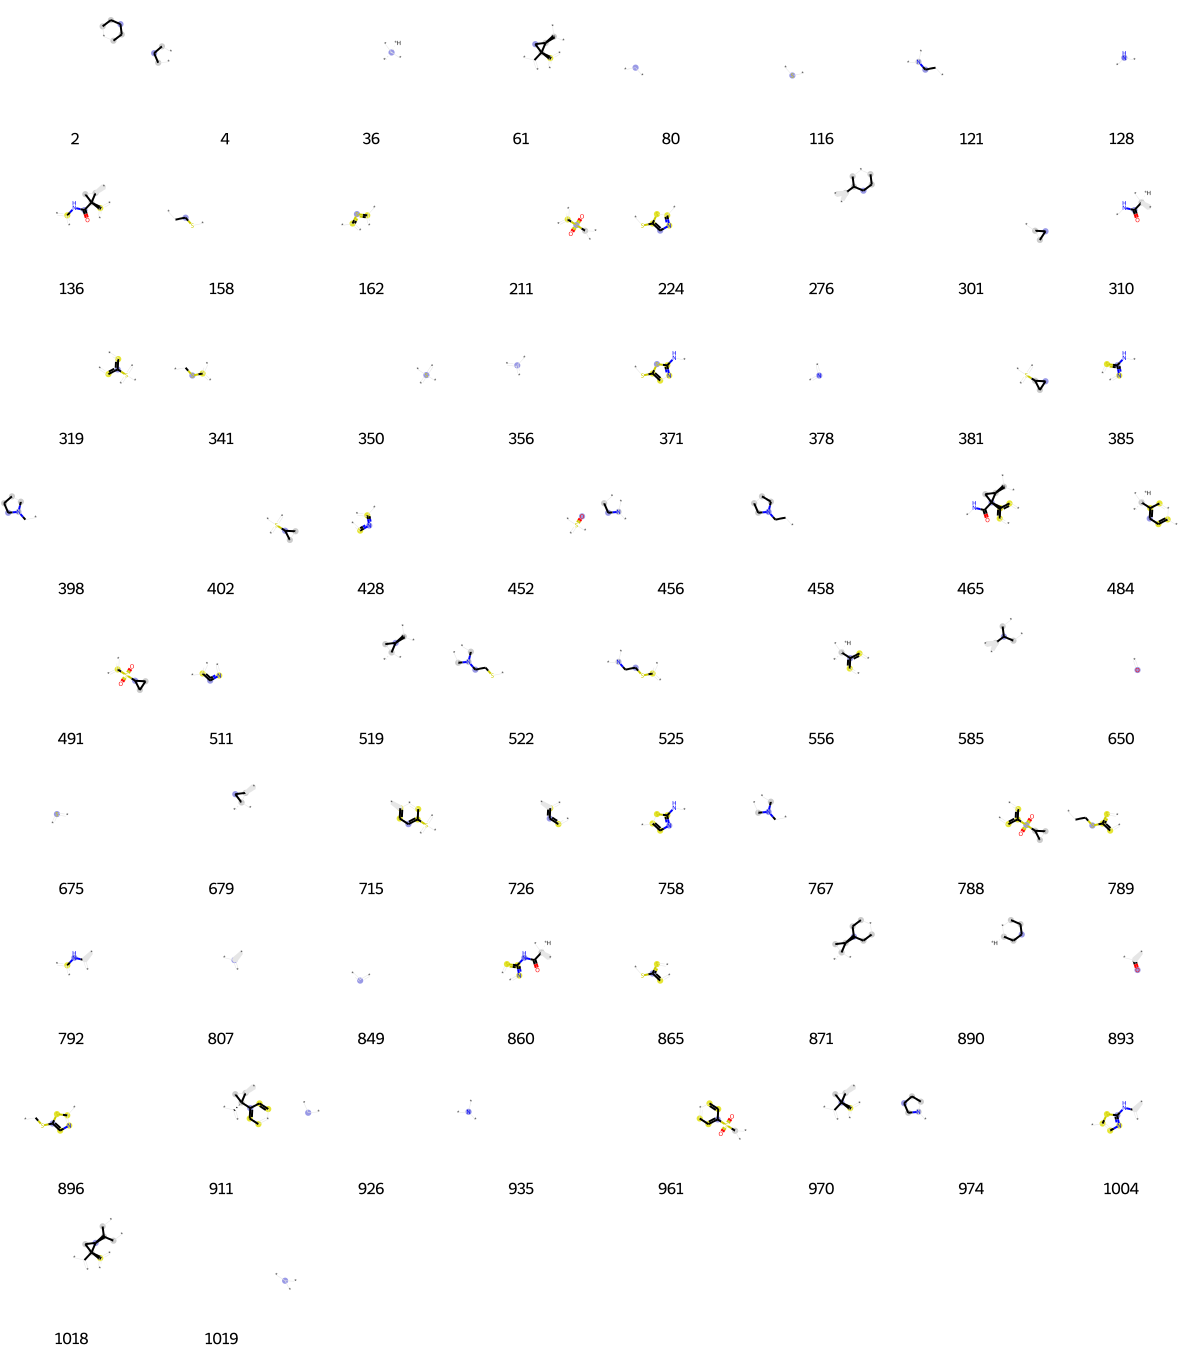

In [8421]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [8422]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[1,
 3,
 32,
 33,
 43,
 57,
 69,
 74,
 77,
 80,
 90,
 94,
 97,
 118,
 119,
 132,
 147,
 194,
 252,
 275,
 277,
 283,
 297,
 312,
 315,
 324,
 329,
 333,
 356,
 378,
 397,
 401,
 405,
 416,
 421,
 428,
 464,
 489,
 503,
 593,
 650,
 669,
 695,
 698,
 699,
 702,
 721,
 726,
 765,
 786,
 807,
 817,
 849,
 875,
 878,
 893,
 895,
 898,
 904,
 915,
 935,
 946,
 1023]

In [8423]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[9,
 15,
 20,
 29,
 33,
 64,
 74,
 80,
 114,
 121,
 128,
 139,
 191,
 193,
 231,
 245,
 254,
 259,
 271,
 301,
 356,
 366,
 387,
 407,
 456,
 458,
 484,
 561,
 610,
 623,
 629,
 631,
 647,
 650,
 659,
 726,
 732,
 767,
 807,
 832,
 845,
 849,
 873,
 881,
 893,
 926,
 935,
 974,
 1011,
 1019]

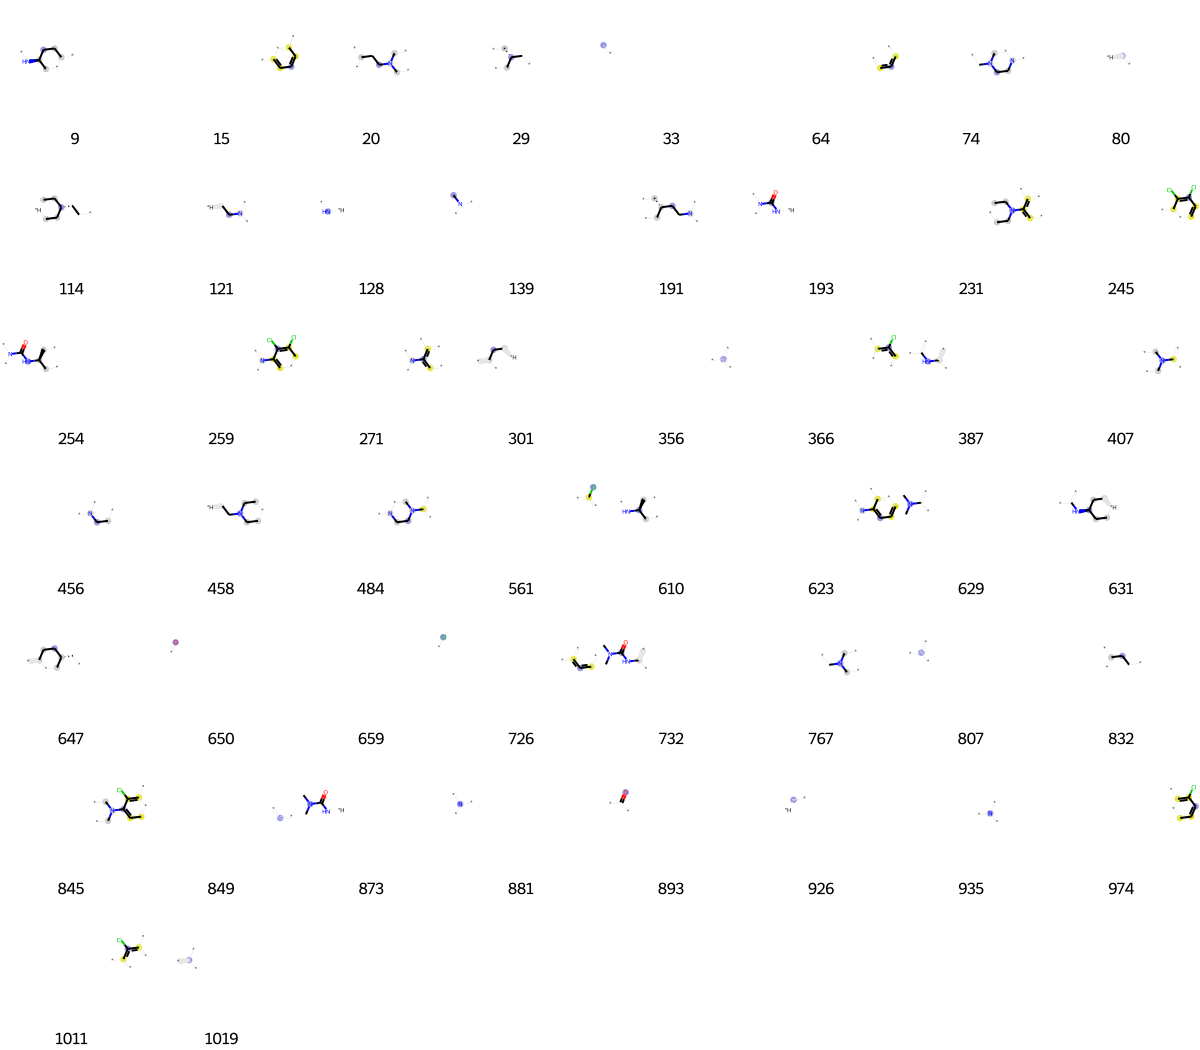

In [8424]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [8425]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 53,
 64,
 78,
 79,
 80,
 106,
 114,
 117,
 128,
 175,
 191,
 289,
 310,
 356,
 361,
 389,
 411,
 456,
 486,
 573,
 578,
 592,
 640,
 641,
 650,
 673,
 726,
 730,
 736,
 745,
 754,
 792,
 807,
 843,
 849,
 857,
 871,
 893,
 961,
 982]

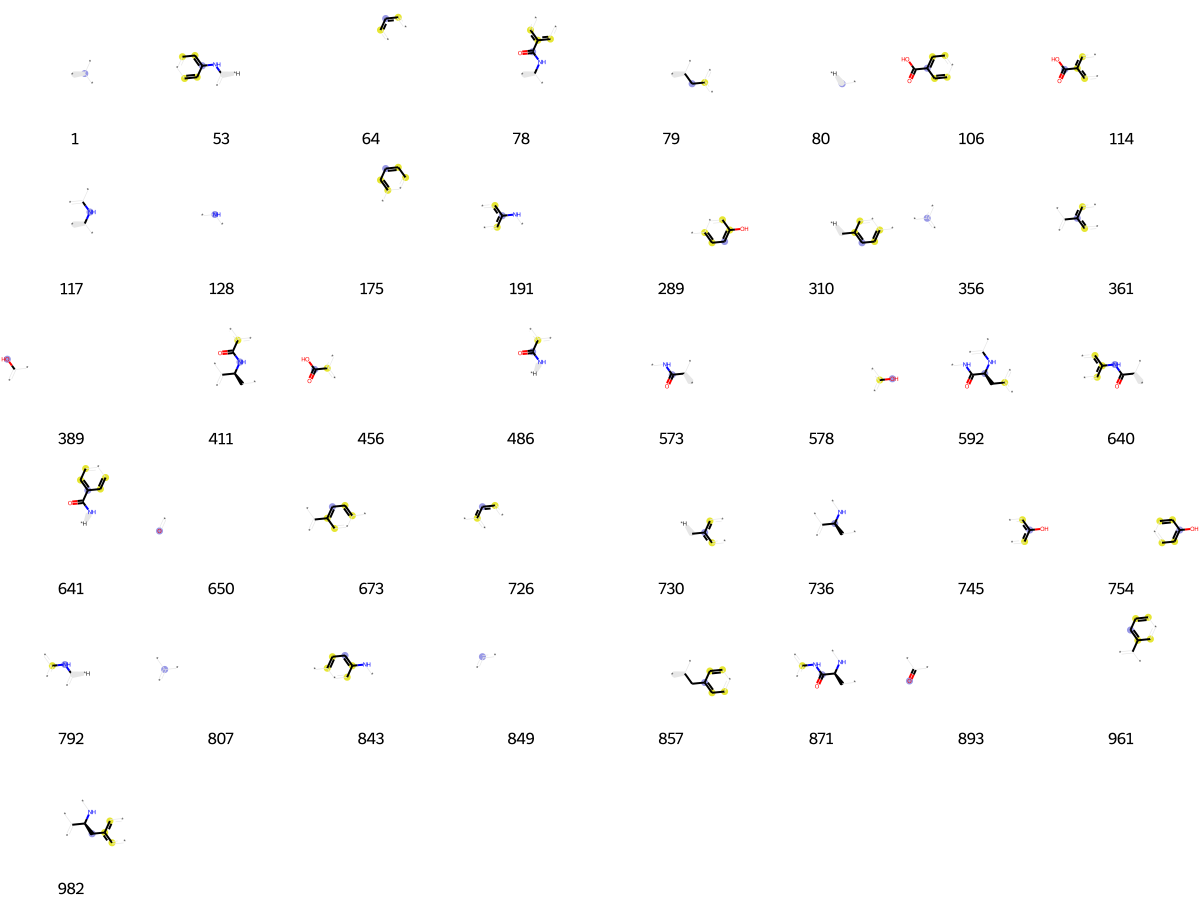

In [8426]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [8427]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[33,
 64,
 86,
 90,
 97,
 119,
 133,
 175,
 206,
 249,
 271,
 275,
 314,
 333,
 338,
 356,
 366,
 504,
 512,
 549,
 557,
 561,
 578,
 650,
 659,
 693,
 695,
 710,
 721,
 726,
 759,
 776,
 777,
 785,
 841,
 849,
 875,
 935,
 946,
 947,
 958,
 969]

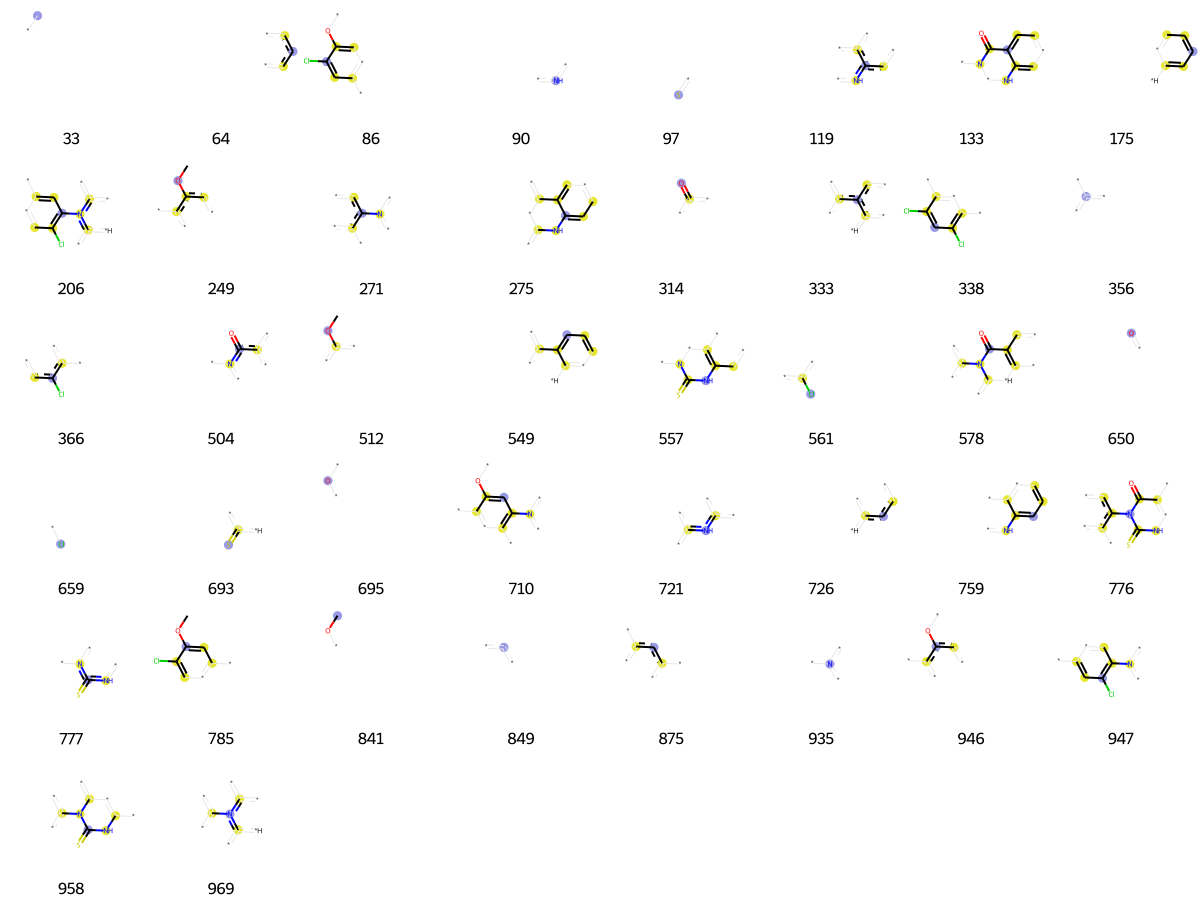

In [8428]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [8429]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[25,
 55,
 73,
 80,
 82,
 125,
 140,
 147,
 244,
 338,
 356,
 361,
 578,
 583,
 584,
 621,
 623,
 673,
 694,
 726,
 736,
 789,
 807,
 835,
 849,
 875,
 878,
 961,
 1009]

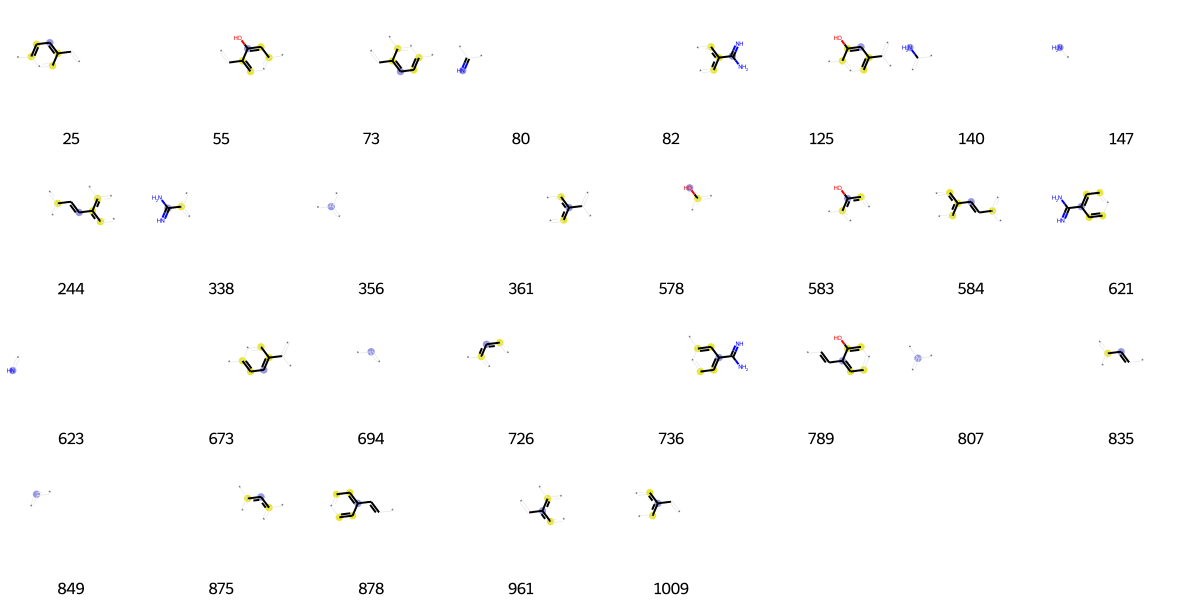

In [8430]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])